# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [2]:
from google.colab import files
import io

uploaded = files.upload()

#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

#df = pd.read_csv(io.BytesIO(uploaded["FIFA2019.csv"]))
#hotel = pd.read_csv(io.BytesIO(uploaded["C:\Usersrakse\Anaconda3\anaconda Navigator\GL\Supervised learing\Logistic Regression\INN-hotel\INNHotelsGroup.csv"]))

Saving INNHotelsGroup.csv to INNHotelsGroup.csv


In [4]:
import io 
# copying the dataset
hotel = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))
df = hotel.copy()

## Data Overview


In [5]:
# Shape of the data
df.shape

(36275, 19)

#### Observations:
- There are 36275 rows and 19 columns in our dataset

In [6]:
# Checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations:
- There are 19 columns.
- 5 columns are of object type.
- 13 integer type.
- 1 float type.

In [7]:
# Let's look at some sample data
df.sample(n=10, random_state=1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392            94.32000                       0   Not_Canceled  
6685            1

####  Observations:
- From the above sample we dont see any any missing values. Let us investigate further for missing values.
- Booking ID looks like unique id for each booking.
- type_of_meal_plan, room_type_reserved,market_segment_type and booking status look like categorical type.

In [8]:
# Checking for missing values
df.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

#### Observations:
- It looks like there is no missing values.

In [9]:
# checking duplicate values in the data
df.duplicated().value_counts()

False    36275
dtype: int64

#### Observations:
- There is no duplicated rows.

#### Checking if number of adults and number of children both are 0 

In [10]:
df[(df["no_of_adults"] == 0) & (df["no_of_children"] == 0)].shape[0]

0

#### Observations:
- There are no bookings with zeros for both adults and children.

In [11]:
# Let us drop booking ID before EDA since it is very not important feature for analysis
df = df.drop("Booking_ID", axis=1)

#### Checking if both week nights and weekend nights are 0

In [12]:
df[(df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)].shape[0]

78

#### Observations:
- There are 78 bookings with both weeknights and weekend nights being zeros.
- This looks like data entry error as any booking must fall under either weeknight or weekend night.
- We can delete those rows during data pre-processing

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Statistical summary of the data

In [13]:
# summary of the numerical data
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

#### Observations:
- Most of the times 2 adults book the room. Maximum is 4 adults.
- There are 0 children for 25%,50% and 75% of the data,indicating most of the bookings does not include children.
- Maximum 7 weekend nights are booked, i.e. room is booked for more than 3 weeks. 50% of the time 1 weekend night is booked.
- Maximum of 17 days week nights are booked. 50% of the times 2 week nights are booked.
- Most of the bookings did not requires a parking spot. Maximum required parking space is 1.
- Minimum of 0 in lead time indicates there are same day bookings in the data. Median value 57 indicates the bookings with almost 3 monthe early. Maximum of 443 days is like more than a year ahead booking. This looks interesting.
- Maximum value 13 for the column no_of_previous_cancellations indicates there is/are repeated guest/guests who canceled the booking for 13 times.
- Maximum value 58 for the column no_of_previous_bookings_not_canceled indicates there is/are repeated guest/guests who booked the room for 58th time. This looks very valuable customer for the hotel.
- Average price per room has mean value of about 103 euros. Minimum value of 0 indicates booking with no cost.
- Maximum number of special request made for a booking is 5.

In [14]:
# summary statistics of non numeric data
df.describe(include="object").T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

#### Observations:
- There are 4 diffrent meal plans vailable. Meal plan 1 is the most frequently opted by guests.
- There are 7 types of rooms available in the hotel. Room Type 1 is the most booked room type.
- There are 5 different market segments. Most guests book through online booking.
- The target variable booking status has 2 values. Most of the bookings are not canceled.

## Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.3f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### number of adults

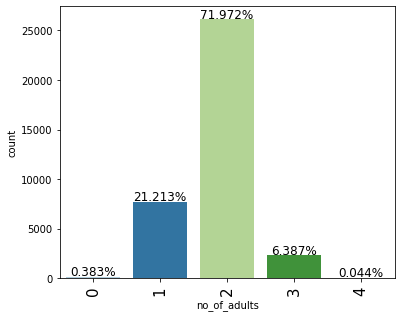

In [17]:
# let us look at number of adults
labeled_barplot(df, "no_of_adults", perc=True)

#### Observations:
- The booking involved with adults have 2 adults about 72% of the times.
- About 21% of the times 1 adult is involved in booking.
- Maximum adults involved in bookings is 4.
- There are 0 adults involved in a booking, indicates rooms booked by only children.

### number of children

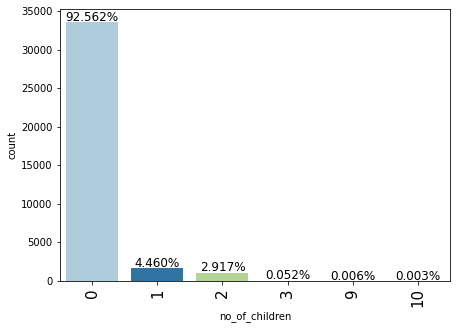

In [18]:
# Let us look at number of children
labeled_barplot(df, "no_of_children", perc=True)

#### Observations:
- Most of the bookings do not have children in it.
- Maximum number of children ionvolved in any booking is 10.
- 4.46% of times 1 child in included.
- 2.92% of the times 2 children are in bookings.
- 0.05% of the times 3 children and 0.01% of the times 9 children are there in a booking.

### Number of weekend nights

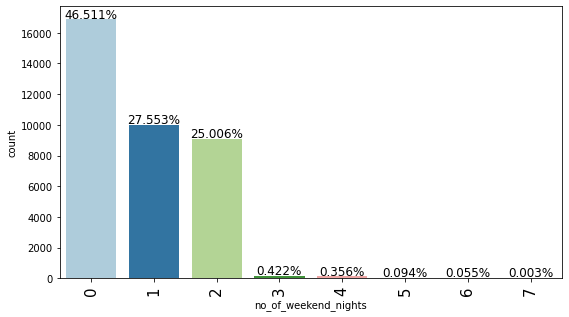

In [19]:
# Let us look at number of weekend nights
labeled_barplot(df, "no_of_weekend_nights", perc=True)

#### Observations:
- About 47% of the time weekends are not booked.
- About 28% of the times 1 weekend night is booked.
- About 25% of the time 2 weekend nights are booked.
- Highest number of weekend nights booked is for 7 weekend nights. 

### Number of weeknights

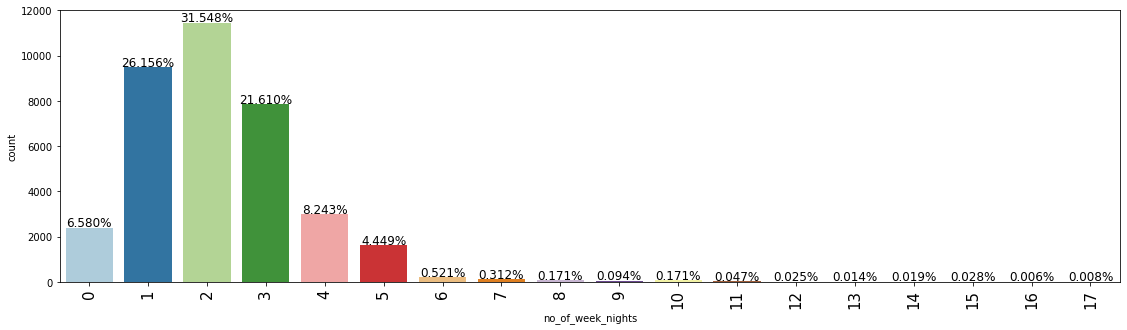

In [20]:
# Let us look at number of week nights
labeled_barplot(df, "no_of_week_nights", perc=True)

#### Observations:
- About 32% of the times 2 weeknights are booked.
- About 26% of the times rooms booked for 1 weeknight. About 22% of the times 3 weeknights are booked.
- Highest numbers of weeknights booked are for 17 weeknights. 

### type of meal plan

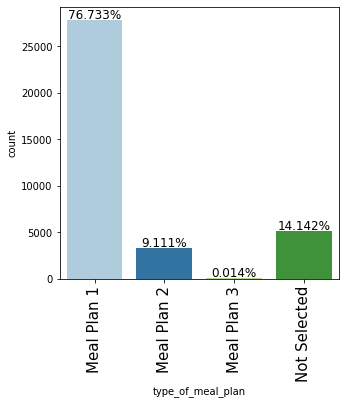

In [21]:
# Let us look at meal plans
labeled_barplot(df, "type_of_meal_plan", perc=True)

#### Observations:
- There are 3 different types of meal plans.
- Most of the times(about 77%) Only Breakfast is selected.
- About 14% of the times no meal plan is selected.
- About 9% of the times breakfast and one other meal is selected.
- Very few bookings select all breakfast, lunch and dinner is selected.

### required car parking space 

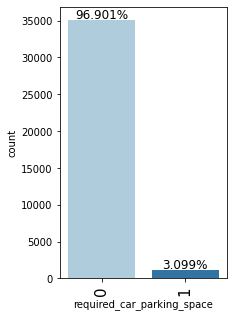

In [22]:
# Let us look at car parking space needed by guest
labeled_barplot(df, "required_car_parking_space", perc=True)

#### Observations:
- About 97% of the times guests do not select car parking space.
- Only 3% of the time 1 parking space is selected.

### room type reserved

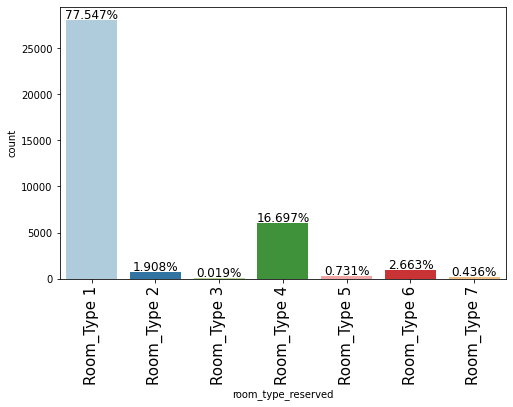

In [23]:
# Let us look at room type reserved
labeled_barplot(df, "room_type_reserved", perc=True)

#### Observations:
- There are 7 types of rooms.
- Room type 1 is most popular.About 78% of the rooms booked are of Room-Type-1
- Room-Type-4 is the second most popular type with about 17% bookings.




### Lead time

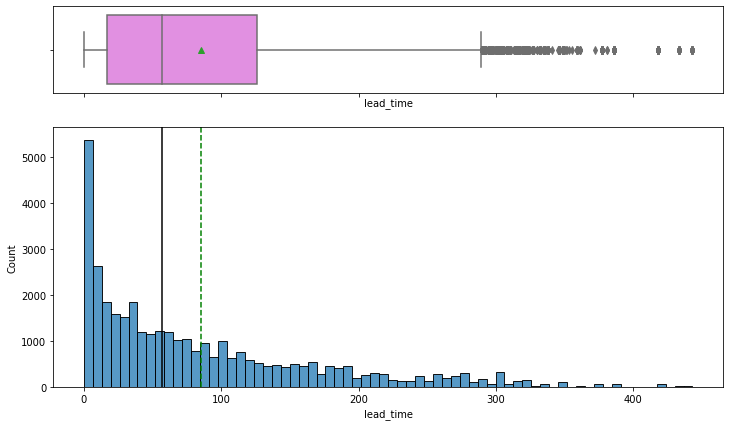

In [24]:
# Let us look at lead time
histogram_boxplot(df, "lead_time")

#### Observations:
- Lead time is heavily right skewed.
- Guests are more likely to plan ahead and book the rooms.
- Mean lead time is about 85 days.
- Minimum value 0 indicates, there are also many bookings done on same day (more than 5000 bookings).
- Maximum lead time is 443 days i.e more than 1 year!
- There are also outliers to the right side, i.e there are many bookings done in between 290 days and 443 days ahead.

### Arrival year

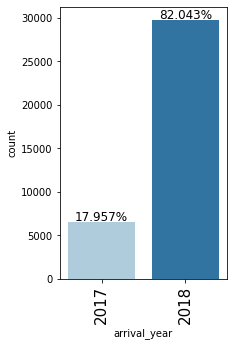

In [25]:
# let us look at arrival year
labeled_barplot(df, "arrival_year", perc=True)

In [26]:
df[df["arrival_year"] == 2017]["arrival_month"].value_counts()

10    1913
9     1649
8     1014
12     928
11     647
7      363
Name: arrival_month, dtype: int64

#### Observations:
- Our data has more data from 2018 compared to 2017.
- Close observation on 2017 records shows that for the year 2017, we have only data from the month of July onwards.

### Arrival month

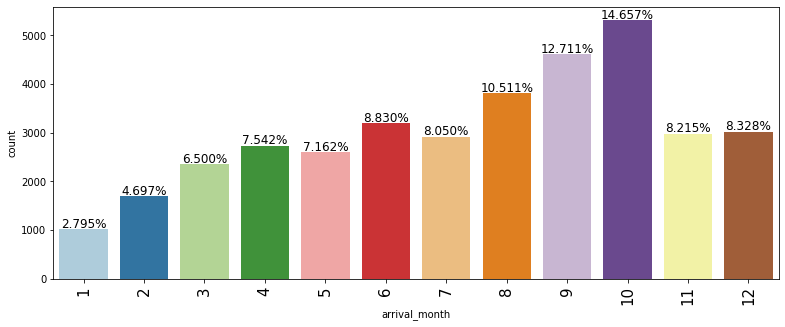

In [27]:
# let us look at arrival month
labeled_barplot(df, "arrival_month", perc=True)

#### Observations:
- From the data, we see that January,February have fewer bookings compared to other months.It may be because of winter weather.
- Bookings increase from July to October in ascending order.
- October is the most booked month.
- Janaury is the least booked month

### market segment type

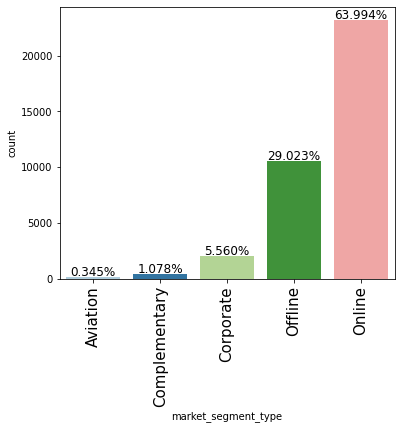

In [28]:
# let us look at market segment
labeled_barplot(df, "market_segment_type", perc=True)

#### Observations:
- From the above graph we see that online bookings are more popular method with 64% of the bookings done through online bookings.
- Offline bookings are of about 29%.
- About 6% are from corporate, 1% of complementary and 0.345% from aviation.

### Repeated guest

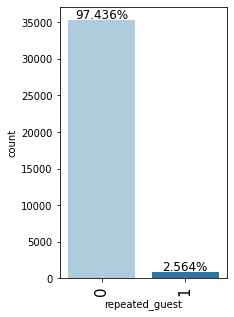

In [29]:
# let us look at the guests if they are repeted or not
labeled_barplot(df, "repeated_guest", perc=True)

#### Observations:
- Aboiut 97% of the guests are not repeated guests.
- Only about 3% of guests are repeated.

### Number of previous cancellations:

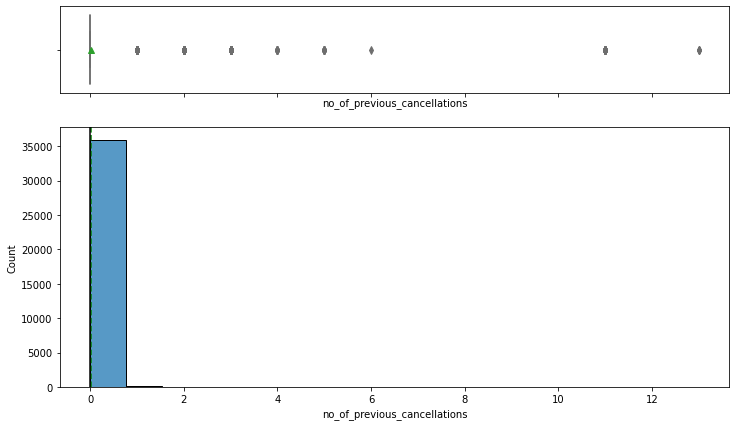

In [30]:
# Let us look at previous cancellations
histogram_boxplot(df, "no_of_previous_cancellations")

#### Observations:
- 99% of the data has previous cancellation is 0.
- It is obvious that there are less number of previous cancellations as non repeated guests can not have previous booking cancelled.
- Maximum of previous cancellations is 13 times.

### number of previous bookings not canceled

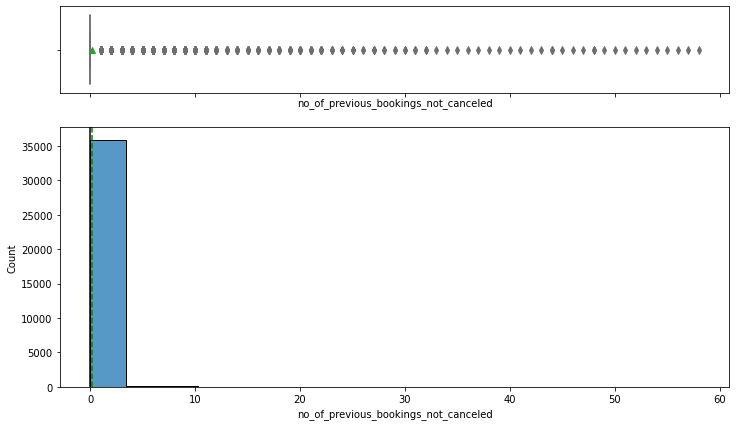

In [31]:
# Let us look at previous bookings that are not canceled
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

#### Observations:
- Most of the data is around 0.
- It is obvious that there are less number of repeated guests, so previous bookings are 0. So previous cancellations also will be 0
- Maximum value 58 represent guests repeated for 58th time without cancelling any previous bookings.

### Average price per room

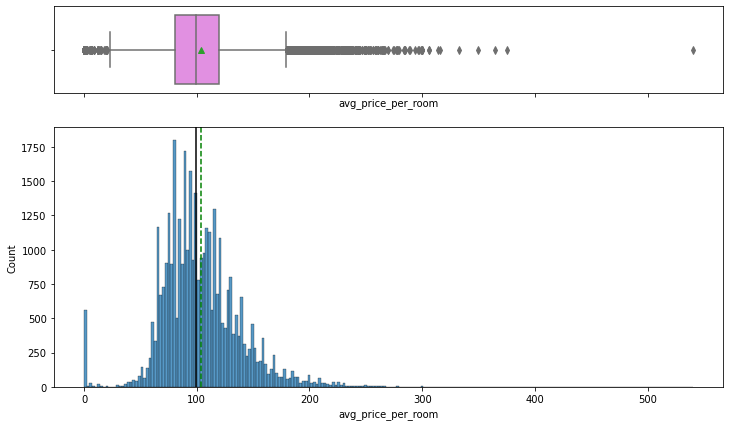

In [32]:
# Let us look at average price per room
histogram_boxplot(df, "avg_price_per_room")

#### Observations:
- Mean and median price is almost same.
- Mean price is 103 euros.
- Median price is around 99.45 euros.
- There are also bookings with 0 i.e free of cost.
- Maximum price is 540 euros.
- There are also outliers on both ends.
- Price looks right skewed.

#### Let us look at bookings with  average price 0

In [33]:
df[df["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

#### Observations:
- There are 545 bookings with 0 average price.
- It looks like market segment affects the bookings with free of cost.

**Let us check our assumption**

In [34]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

- There are 354 Complementary bookings with 0 cost.
- 191 Online market booking with 0 cost.

### Number of Special requests

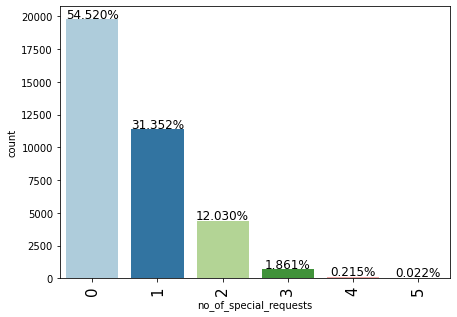

In [35]:
# Let us look at number of special requests
# let us look at the guests if they are repeted or not
labeled_barplot(df, "no_of_special_requests", perc=True)

#### Observations:
- Most of the time no special requests are made.
- 31% of the time 1 special request is made.
- Maximum special request made is 5.

### booking status

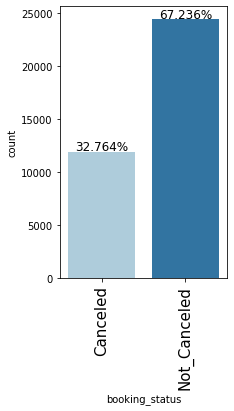

In [36]:
# let us look at the booking status
labeled_barplot(df, "booking_status", perc=True)

#### Observations:
- Around 33% of the bookings are canceled.
- Around 67% of the bookings are not canceled.

**The target variable booking status is of object type. It has 2 categories of values. Let us encode 'Canceled'=1 and 'Not Canceled'=0**

In [37]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

## Bivariate Analysis

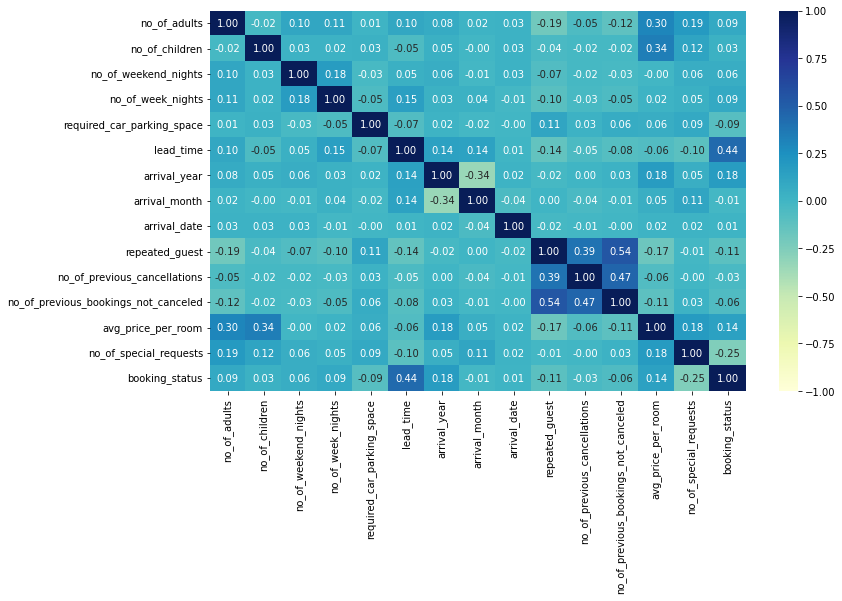

In [38]:
# Let us look at heat map for numeric columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

#### Observations:
- No features are highly correlated to our target variable booking_status.
- booking status and lead time are slightly positively correalted, indicating longer leadtime affects the booking.
- There is no significant correaltion between features. 
- Price of the room is slightly positivel correlated to total number of adults and children.

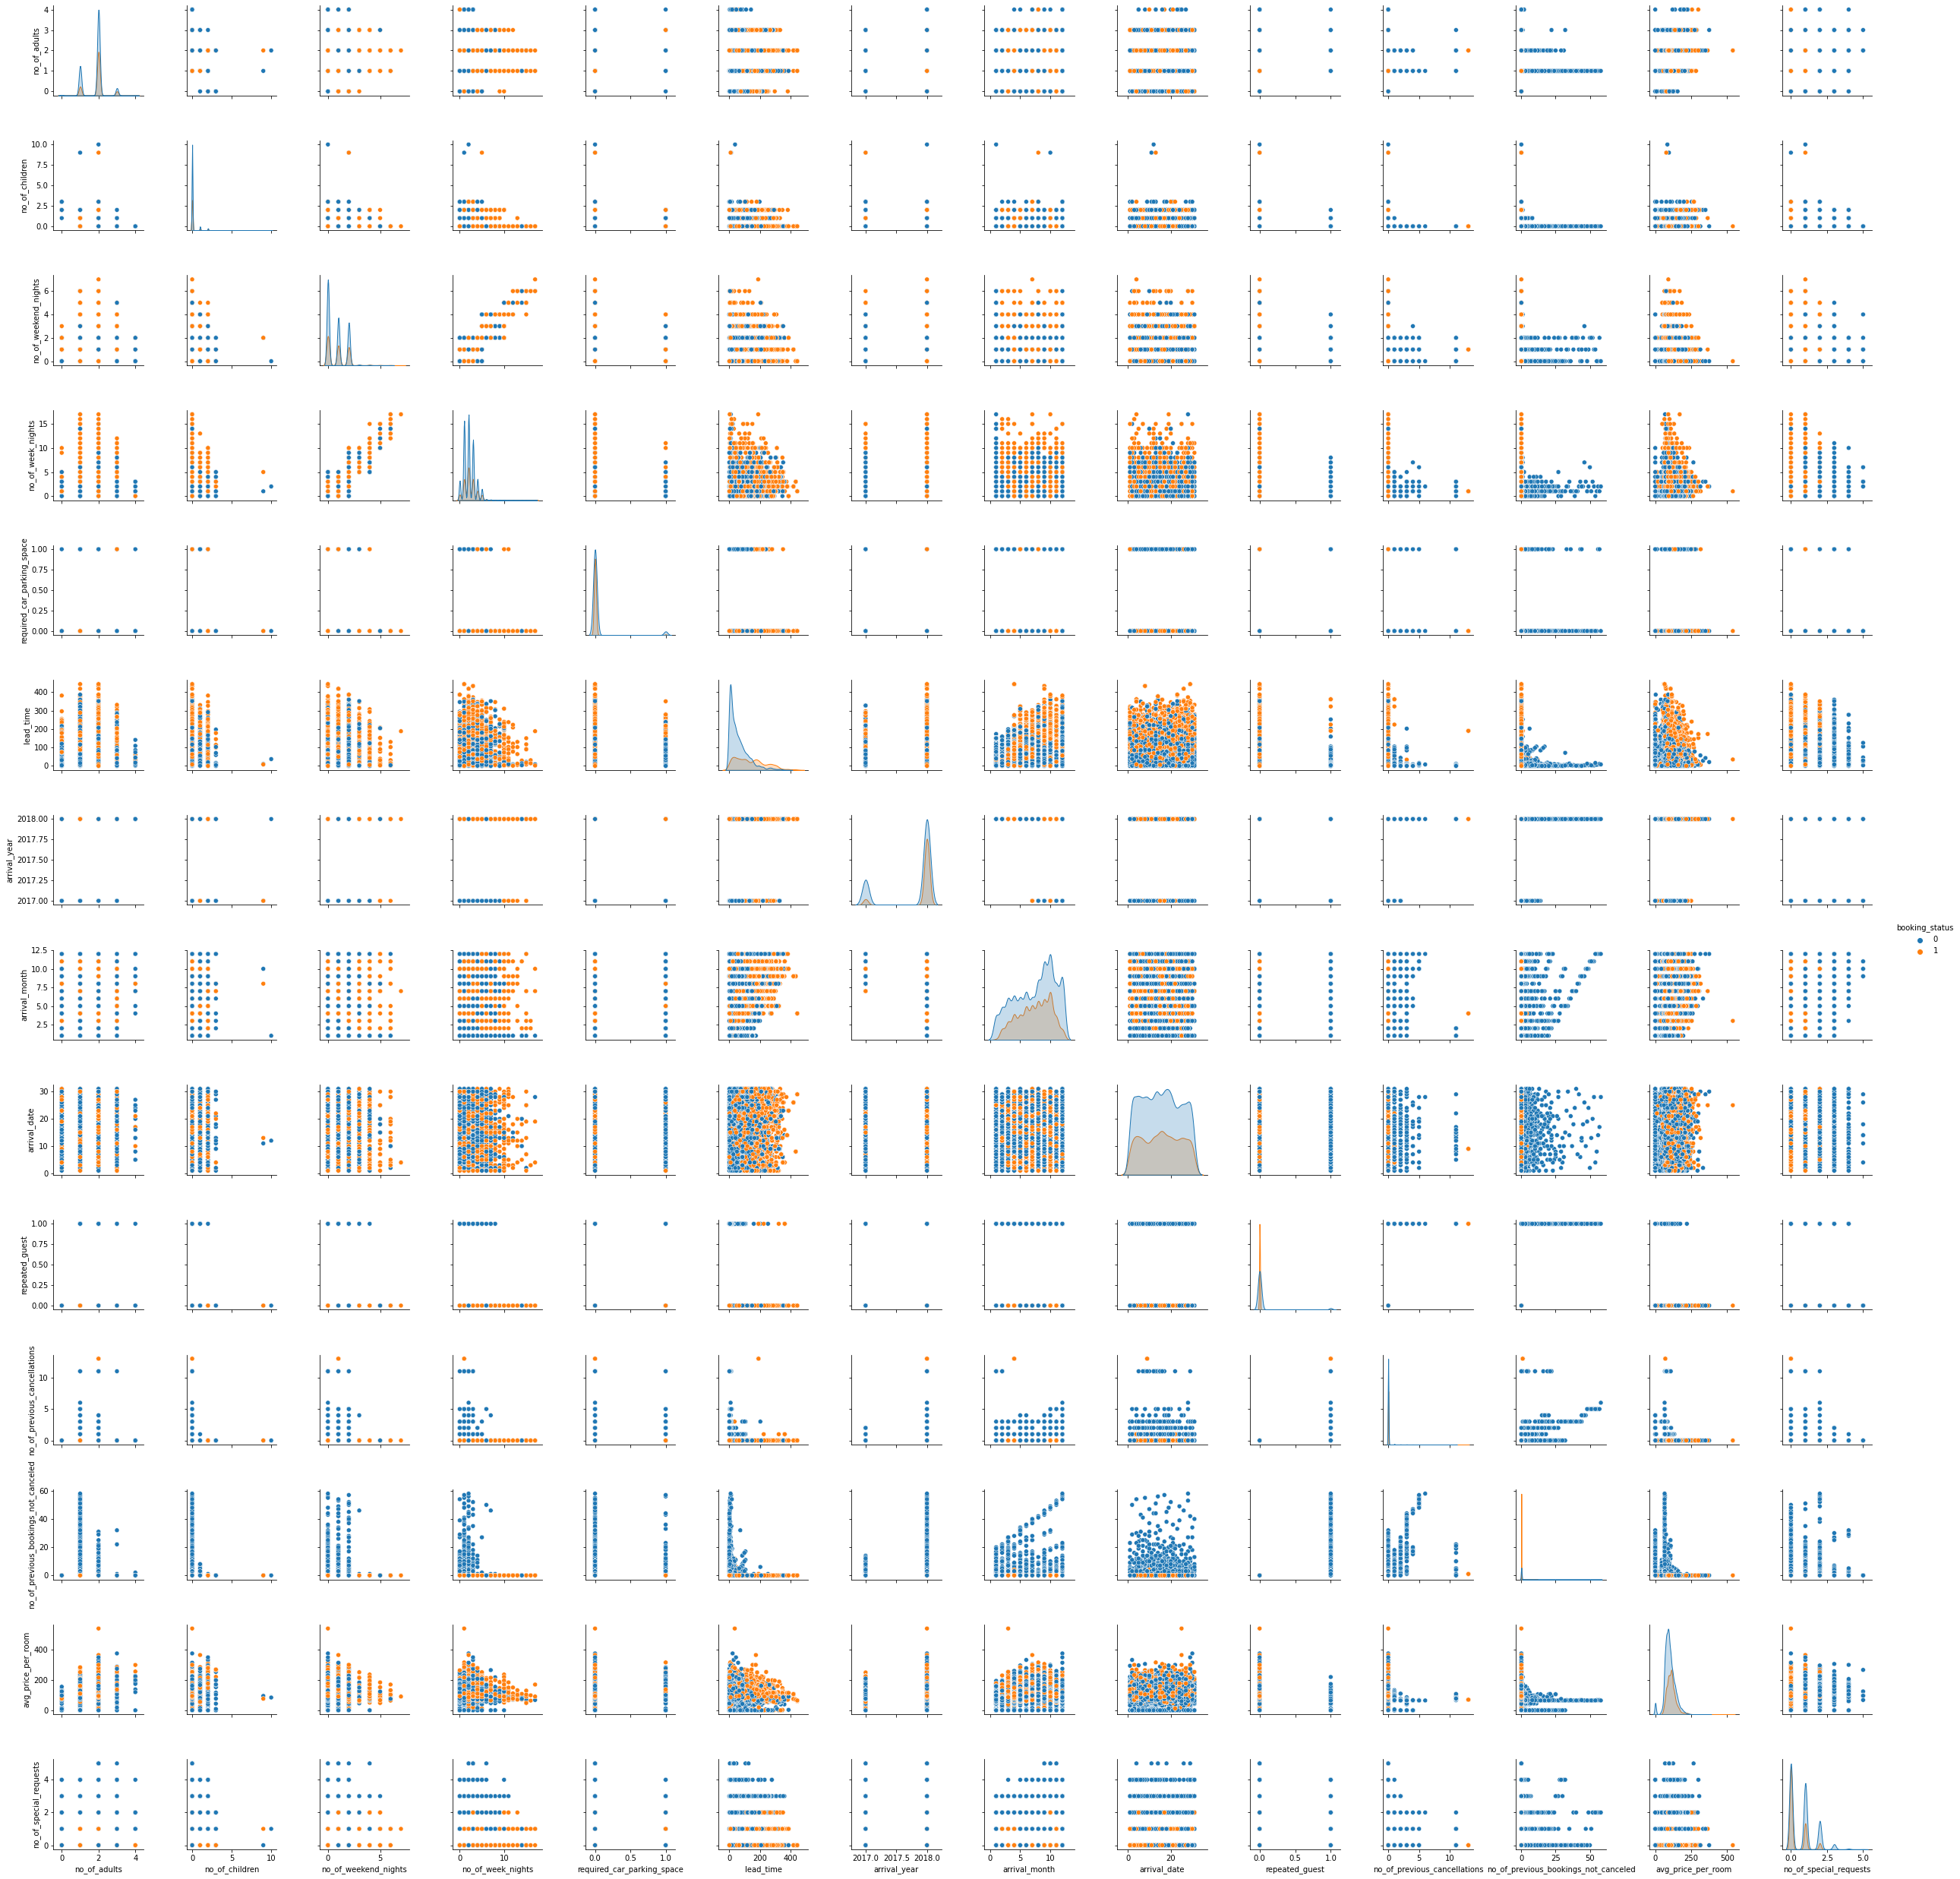

In [39]:
sns.pairplot(data=df, hue="booking_status")
plt.show()


#### Observations:
- We can see varying distribution in variables for booking status. We will investigate it further.

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [41]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Let us look at the busiest month

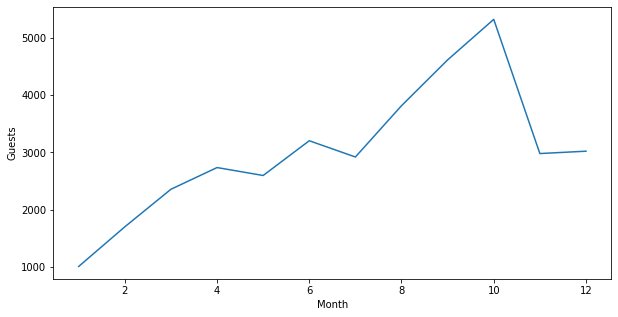

In [42]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

#### Observations:
- October month has highest bookings.
- Janaury observes lowest booking.
- February onwards bookings slowly increases till April.
- Again decreses in May.
- In first of the year, June sees highest bookings.
- July onwards bookings increases a lot till October, then decreses.

### Let us look at which market segment do most of the guests come from and booking status across different segments

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


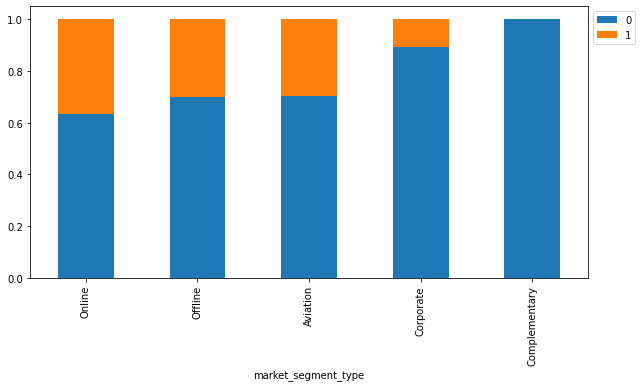

In [43]:
stacked_barplot(df, "market_segment_type", "booking_status")

#### Observations:
- Most of the bookings are from Online market segment.Also most of the cancellations also from online booking.
- Least number of bookings are from aviation.
- None of the Complementary bookings are canceled.As we know that most of the complementary bookings are free of cost.

### Hotel rates are dynamic and change according to demand and customer demographics. Let us see what are the differences in room prices in different market segments

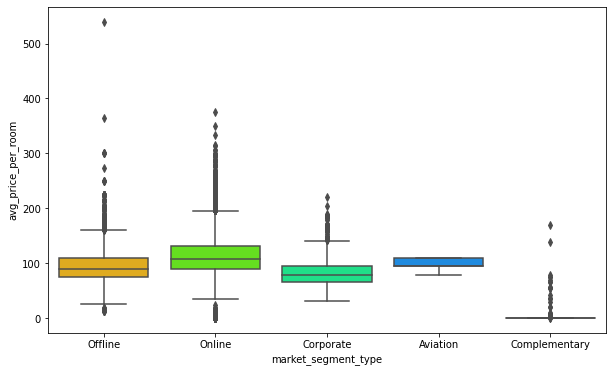

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

#### Observations:
- Online bookings show highest as well as lowest prices with wide range of prices. Also it has outliers at both ends.
- Offline bookings show second highest prices.
- Aviation bookings have low range of values.Also there are no outliers.
- Complementory bookings have median around 0. Also it has outliers in the upper range. Maximum price for Complementory bookings are around 200 euros. 
- Corporate bookings have price ranging from 25 euros to maximum of around 240 euros.

### Hotel rates are dynamic .Let us see what are the differences in room prices for each month

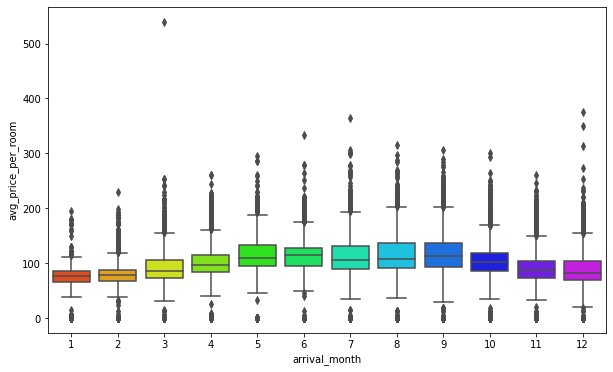

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="arrival_month", y="avg_price_per_room", palette="gist_rainbow")
plt.show()

#### Observations:
- January  sees lowest price as it is not busiest month and low bookings.
- June has highest median price of around 100 euros.
- December has lots of outliers and highest price as it is holiday season.
- Most of the months avg price is in the range of 40-200 euros excluding outliers.

### Let us see how avgerage price of the room affects booking status.

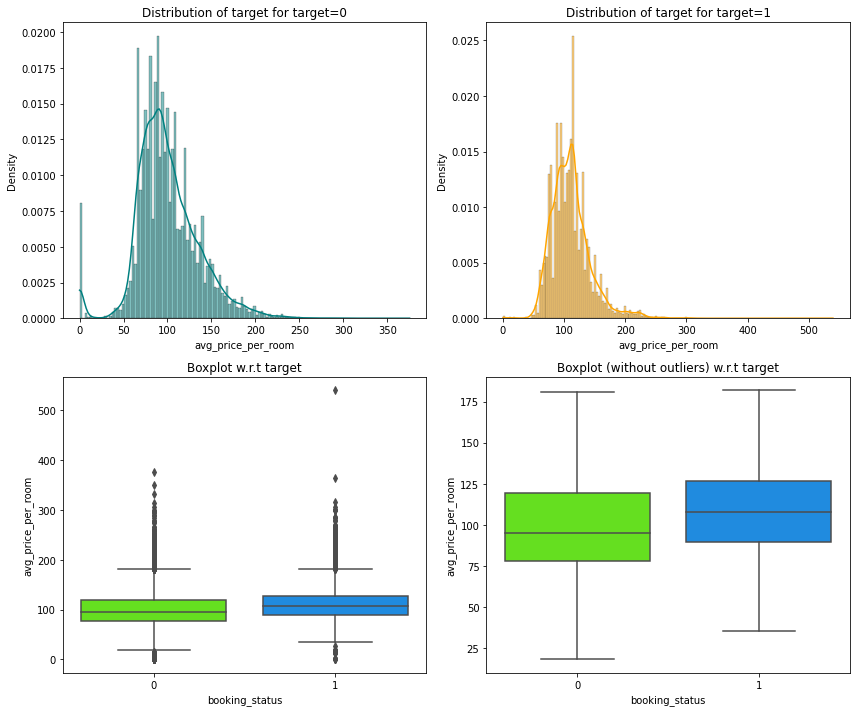

In [46]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

#### Observations:
- Canceled bookings have median price above 100 euros.
- Bookings that are not canceled have median price below 100 euros.

### Let us see bookings status monthwise

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


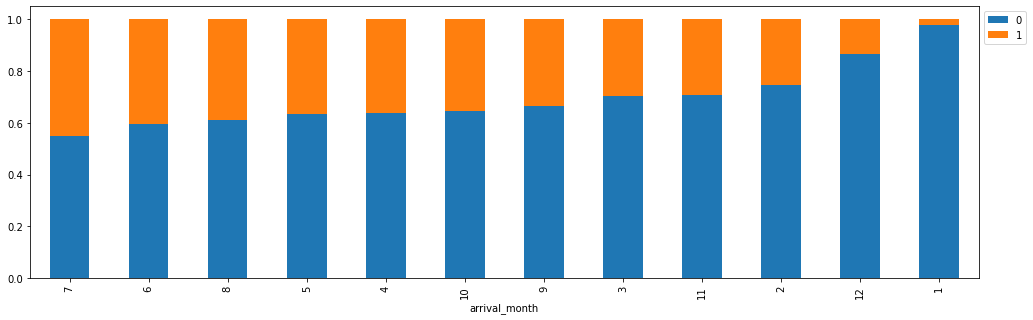

In [47]:
# stacked barplot for monthly booking status
stacked_barplot(df, "arrival_month", "booking_status")

#### Observations:
- July month observes highest percentage of cancellations.
- Most of the months see around 30%-40% bookings canceled.
- Lowest booked months see low percentage of cancellations.
- Overall around 30% of the bookings are canceled.

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let us see what percentage of repeating guests cancel?

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


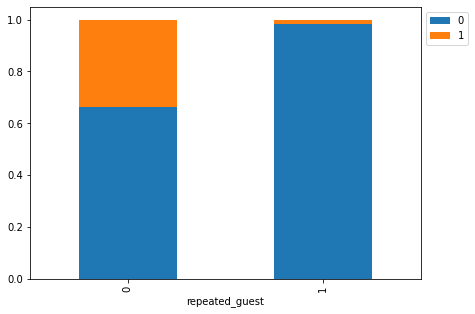

In [48]:
# stacked barplot for repeated guests booking status
stacked_barplot(df, "repeated_guest", "booking_status")

#### Observations:
- Repeated guests are less likely to cancel the bookings.
- Around 35% of non repeated guests are likely to cancel.

### Many guests have special requirements when booking a hotel room. Let us see if  these requirements affect booking cancellation

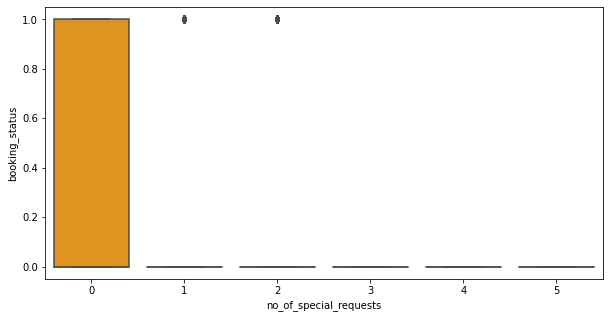

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="no_of_special_requests",
    y="booking_status",
    palette="gist_rainbow",
)  ## Complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.show()

#### Observations:
- Most of the bookings does not have special requirements.
- When there is a special requirement it is less likely cancelled.

### Let's see if the special requests made by the customers impacts the prices of a room

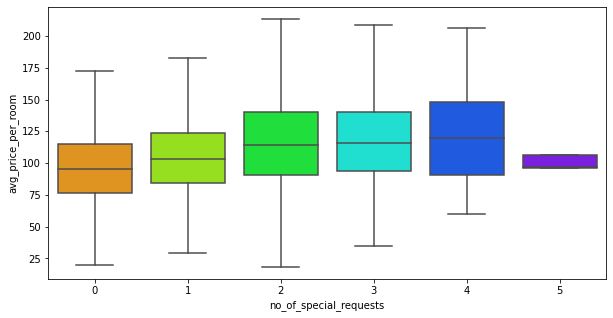

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="no_of_special_requests",
    y="avg_price_per_room",
    palette="gist_rainbow",
    showfliers=False,
)
plt.show()

#### Observations:
- When there is no special requests median price is less than 100 euros.
- price changes upto 4 special requests. 

### There is a positive correlation between booking status and lead time. Let's analyze it further

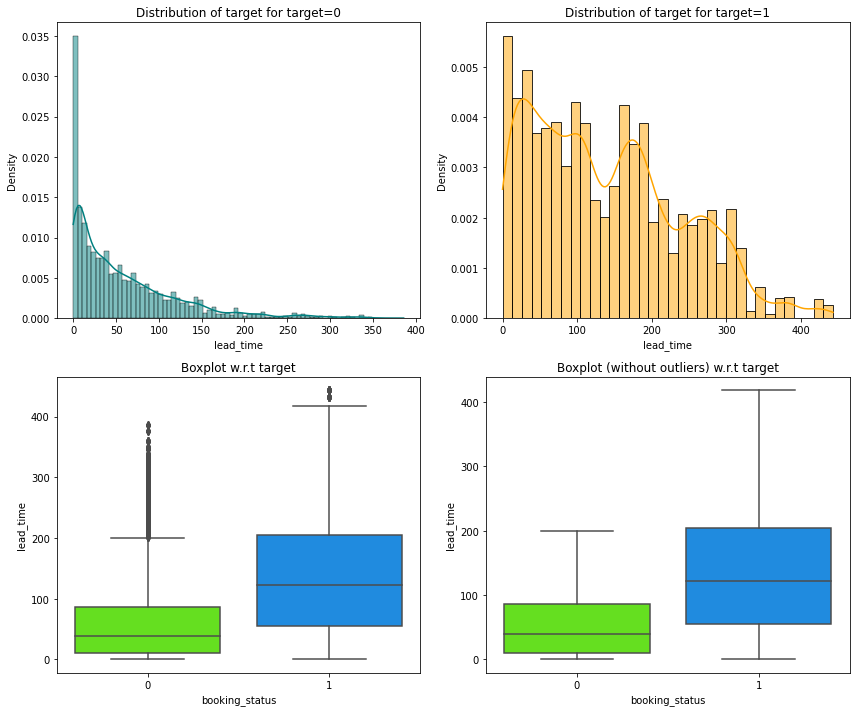

In [51]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

#### Observations:
- The bookings done within 100 days are less likely to be canceled.
- Most of the canceled bookings are done within 50 to 200 days.
- If there are no outliers bookings done above 200 days are likely to be canceled.

### Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.

In [52]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [53]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


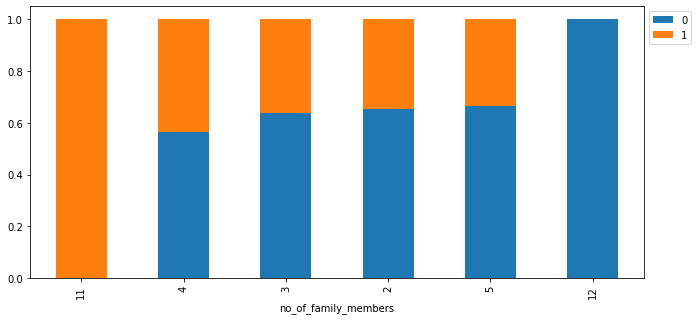

In [54]:
stacked_barplot(
    family_data, "no_of_family_members", "booking_status"
)  ## Complete the code to plot stacked barplot for no of family members and booking status

#### Observations:
- When number of guests in a booking is up 5, it is less likely to be canceled.
- When total number of guests in bookings is above 10 is unpredictable.

### Guests who plan for more number of days are likely to be not canceling the bookings. Let us analyze how duration of the stay affects bookings.

In [55]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [56]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

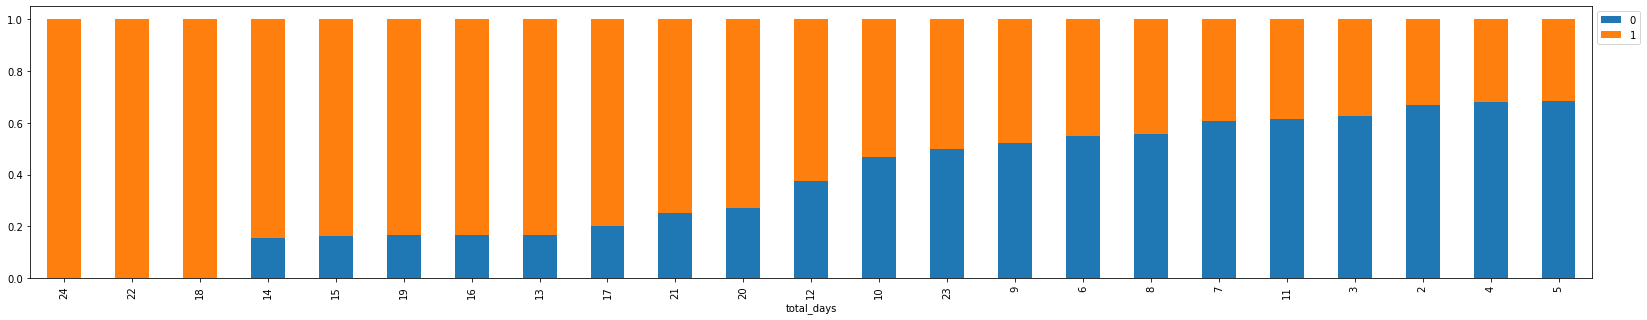

In [57]:
stacked_barplot(
    stay_data, "total_days", "booking_status"
)  ## Complete the code to plot stacked barplot for total days and booking status

#### Observations:
- Customers who plan for more days are likely to cancel the booking.
- Customers who plan for fewer days are less likely to cancel the booking.

### Data Preprocessing

In [58]:
# As we found earlier there are records with both weeknights and weekends being 0. Let us drop them
indexNames = df[ (df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)].index
df.drop(indexNames , inplace=True)

In [59]:
#Let us check them again after dropping
df[(df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)].shape[0]

0

#### Now there are no records with both weekend and weekday being 0.

### outlier check

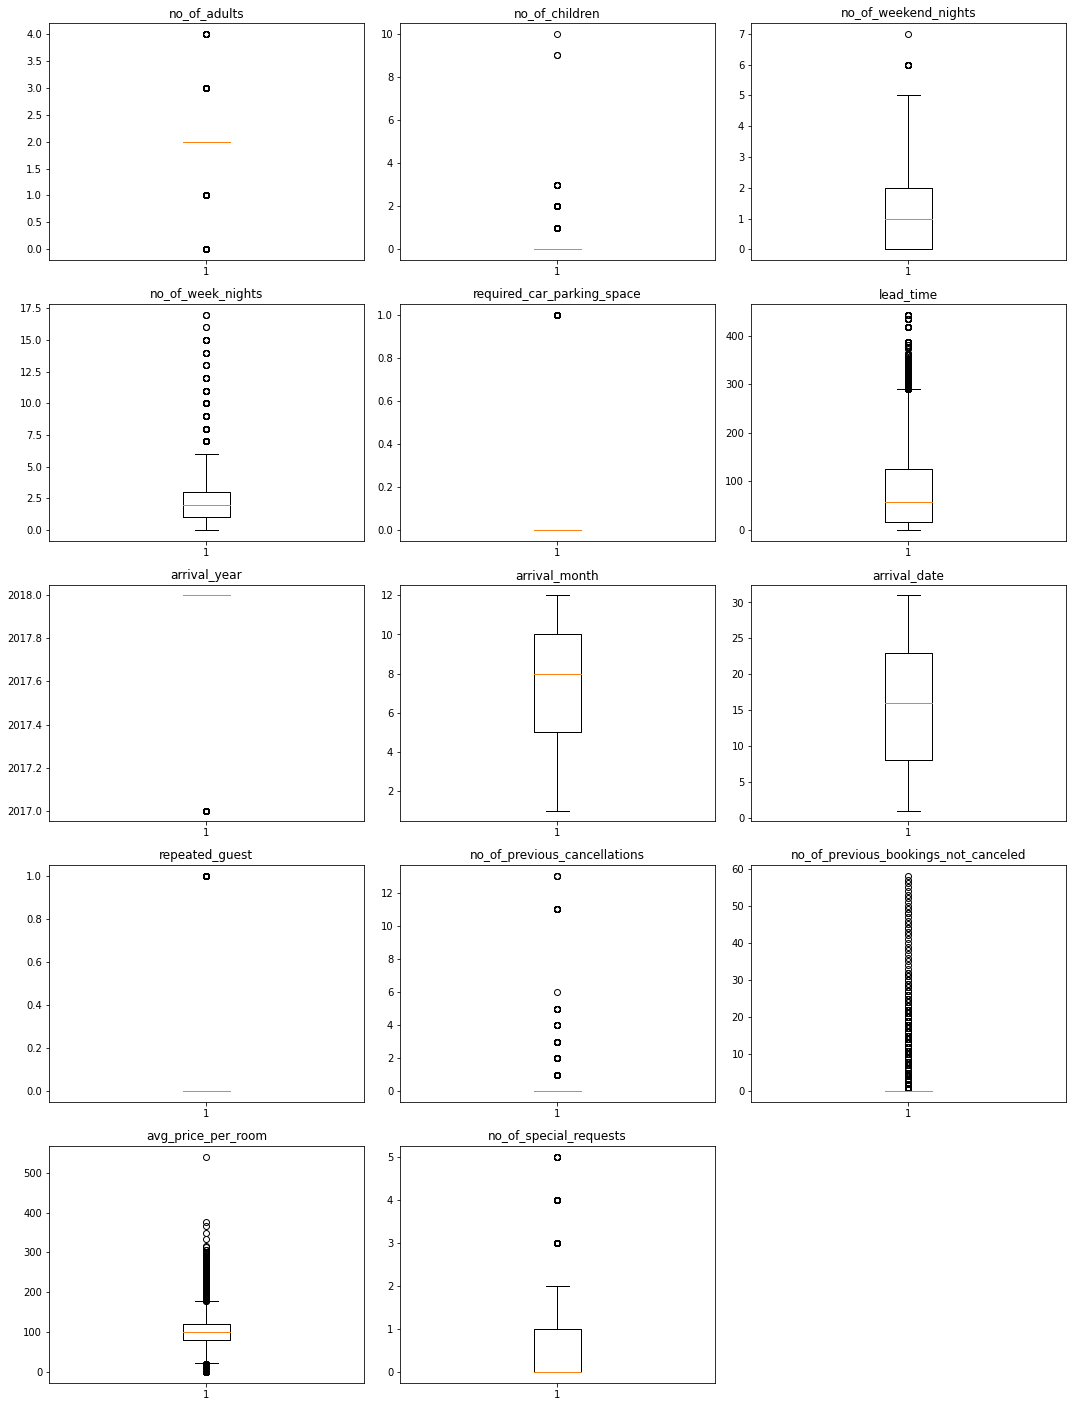

In [60]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- Outliers in the number of adults shows that usually 2 adults are in a booking. Maximum of 4 adults are in a booking.Minimum of 0 adults in a booking i.e booked by children. Outliers here are not extreme values. They are very normal.

- Outliers in the number of children shows, usually most of the bookings does not involve children. Bookings with children look like outliers. Again this is also not extreme values. It is a very normal values.

- Number of weekend nights has outliers. If any booking is done for more than 5 weekend nights it seems like outliers. This is the customer booking for longer duration that mean duration. There are not large outliers. Let us keep them as it is.

- Number of weeknights also has outliers at upper end. Any bookings done for more than 6 days looks like outliers. Maximum booking duration is for around 17 days. Let us keep them as it is.

- Required car parking shows any booking requiring car space as outliers. This is because usually most of the bookings does not require car parking space.

- Lead time has lots of outliers. Bookings done around more than 300 days ahead looks like outliers.

- Arrival year has outliers for the year 2017. Since most of the bookings are from 2018 and 2017 bookings are from July onwards. It looks like outlier. But it is also normal value.

- Arrival month and date does not have outliers.

- Most of the bookings are not from repeated guests. So repeated customers' bookings look like outliers here. 

- Since there are less repeated guests in bookings, there are outliers for both number  previous cancellations and not cancelled ones.

- Since average price of the room is depending on various factors, there are outliers.We treated average price greater than 500 euros with 1.5 times of IQR. Let us keep rest of them as it is.

- Outliers in the number of special requests also not extreme values. Usually most of the  bookings does not have special requests. Whenever requets are made it seems like outliers.


### Outlier treatment

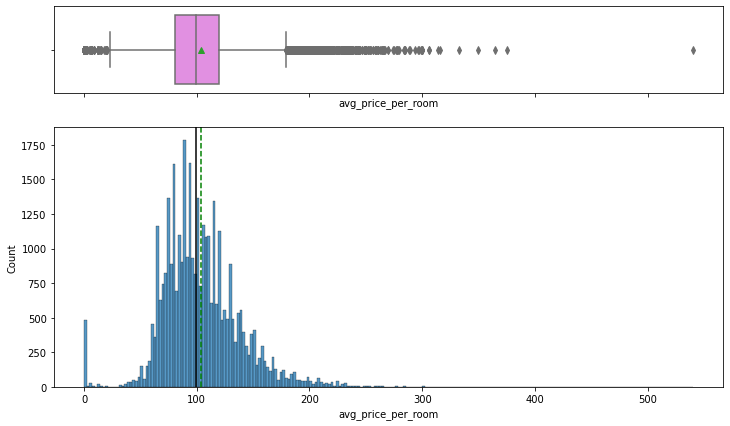

In [61]:
# We have seen that average price per room has outliers, Let us treat them
histogram_boxplot(df, "avg_price_per_room")

In [62]:
# Let us assign average price per room greater than 500 with 3*IQR

# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 3 * IQR
Upper_Whisker


238.23000000000002

In [63]:

# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

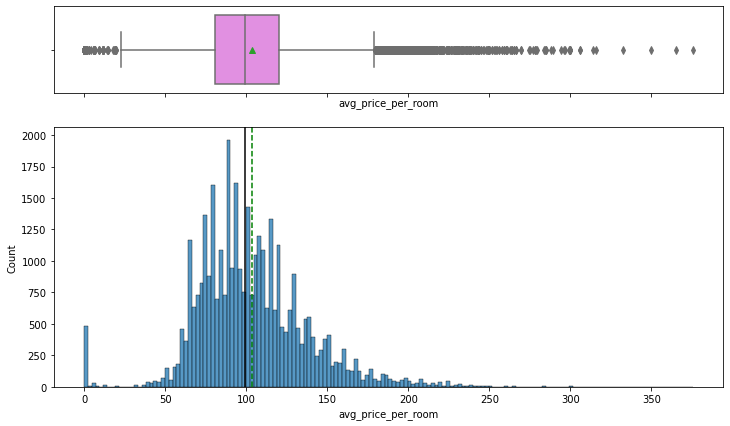

In [64]:
# Histogram boxplot of average price per room after outlier treatment
histogram_boxplot(df, "avg_price_per_room")

#### Now all the outliers i.e prices above 500 euros are treated.

#### Let us drop arrival year column as is not significant. For the year 2017 there are records only from month July onwards and arrival year is not significant in prediction as of now.

In [65]:
df=df.drop('arrival_year',axis=1)

In [66]:
print(df.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')


Arrival year column removed

In [67]:
# let us convert month to categorical
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
df["arrival_month"] = df["arrival_month"].map(month_map).astype("category")

## EDA

- It is a good idea to explore the data once again after manipulating it.

####Let us look at statistical summary of the data


In [68]:
df.describe().T

count      mean      std     min  \
no_of_adults                         36197.00000   1.84543  0.51864 0.00000   
no_of_children                       36197.00000   0.10531  0.40273 0.00000   
no_of_weekend_nights                 36197.00000   0.81247  0.87077 0.00000   
no_of_week_nights                    36197.00000   2.20905  1.40870 0.00000   
required_car_parking_space           36197.00000   0.03105  0.17346 0.00000   
lead_time                            36197.00000  85.31395 85.93693 0.00000   
arrival_date                         36197.00000  15.59801  8.74140 1.00000   
repeated_guest                       36197.00000   0.02558  0.15789 0.00000   
no_of_previous_cancellations         36197.00000   0.02337  0.36869 0.00000   
no_of_previous_bookings_not_canceled 36197.00000   0.15347  1.75579 0.00000   
avg_price_per_room                   36197.00000 103.63807 34.72839 0.00000   
no_of_special_requests               36197.00000   0.61947  0.78637 0.00000   
booking_status                       36197.00000   0.32829  0.46960 0.00000   

                                          25%      50%       75%       max  
no_of_adults                          2.00000  2.00000   2.00000   4.00000  
no_of_children                        0.00000  0.00000   0.00000  10.00000  
no_of_weekend_nights                  0.00000  1.00000   2.00000   7.00000  
no_of_week_nights                     1.00000  2.00000   3.00000  17.00000  
required_car_parking_space            0.00000  0.00000   0.00000   1.00000  
lead_time                            17.00000 57.00000 126.00000 443.00000  
arrival_date                          8.00000 16.00000  23.00000  31.00000  
repeated_guest                        0.00000  0.00000   0.00000   1.00000  
no_of_previous_cancellations          0.00000  0.00000   0.00000  13.00000  
no_of_previous_bookings_not_canceled  0.00000  0.00000   0.00000  58.00000  
avg_price_per_room                   80.75000 99.60000 120.12000 375.50000  
no_of_special_requests                0.00000  0.00000   1.00000   5.00000  
booking_status                        0.00000  0.00000   1.00000   1.00000

In [69]:
#
hplot_cols=['lead_time','avg_price_per_room','no_of_previous_cancellations','no_of_previous_bookings_not_canceled']
bplot_cols=['no_of_adults','no_of_children','no_of_week_nights','no_of_weekend_nights','required_car_parking_space','type_of_meal_plan','room_type_reserved','arrival_month','market_segment_type','no_of_special_requests','booking_status']

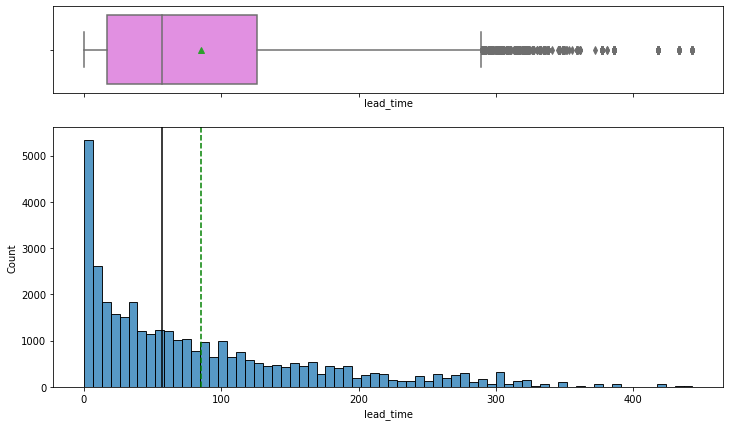

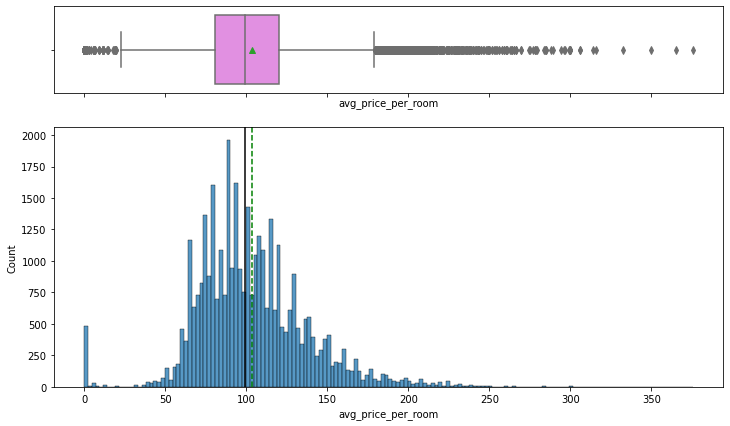

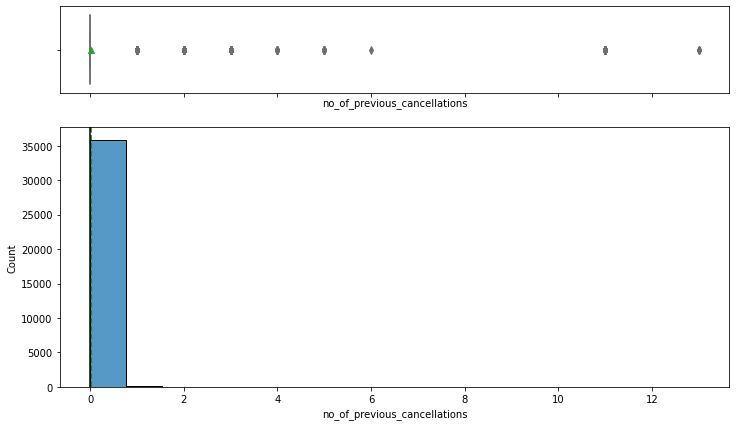

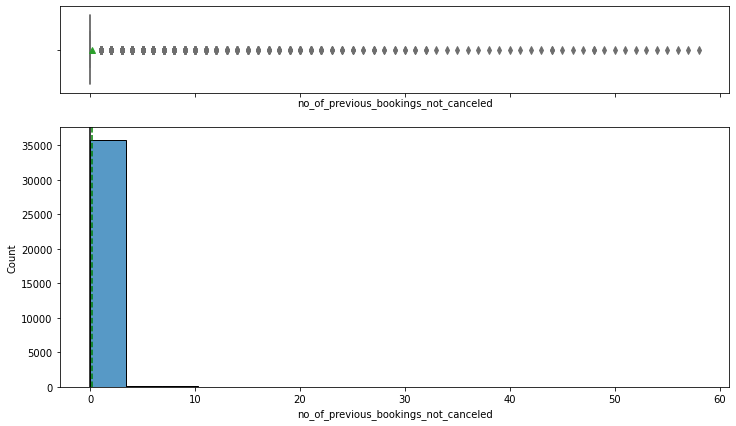

In [70]:
for col in hplot_cols:
  histogram_boxplot(df,col)
  

Labeled barplot for no_of_adults


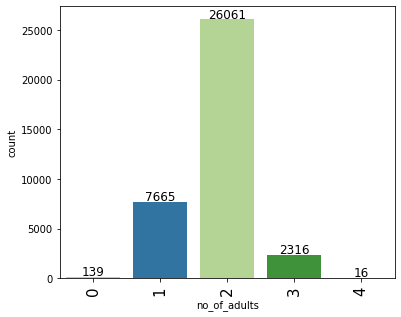

--------------------------------------
Labeled barplot for no_of_children


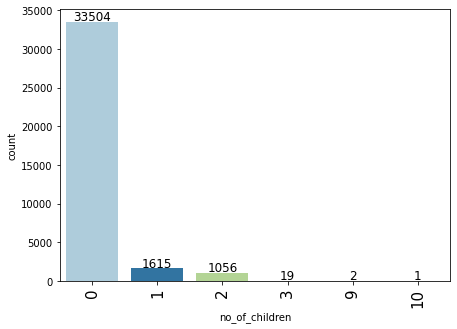

--------------------------------------
Labeled barplot for no_of_week_nights


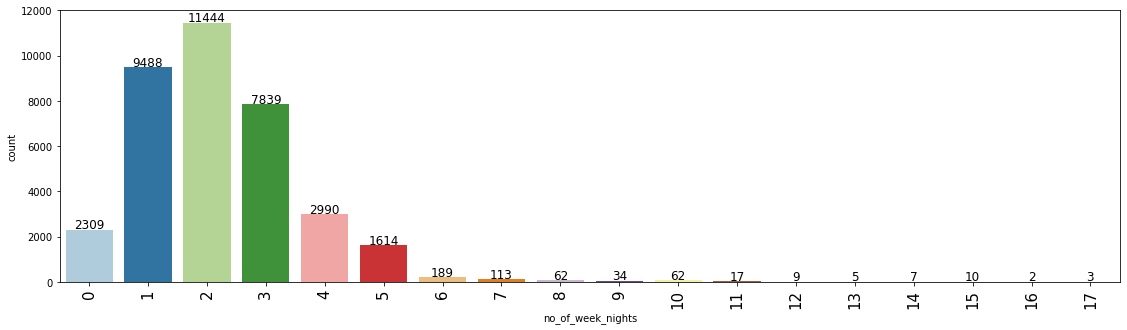

--------------------------------------
Labeled barplot for no_of_weekend_nights


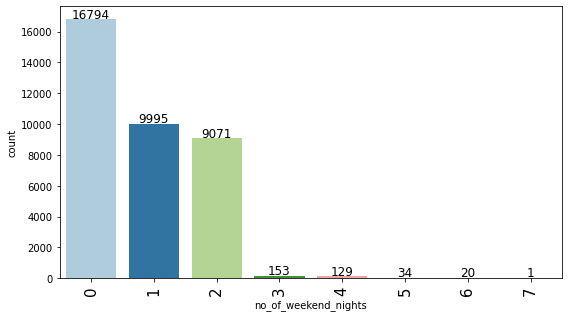

--------------------------------------
Labeled barplot for required_car_parking_space


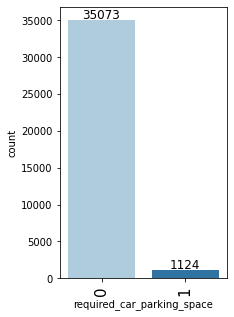

--------------------------------------
Labeled barplot for type_of_meal_plan


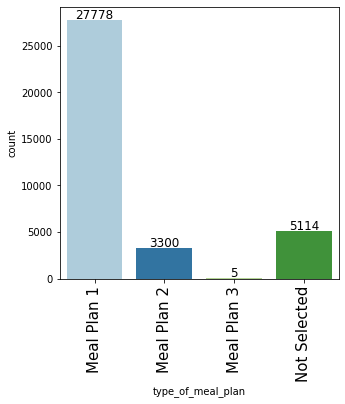

--------------------------------------
Labeled barplot for room_type_reserved


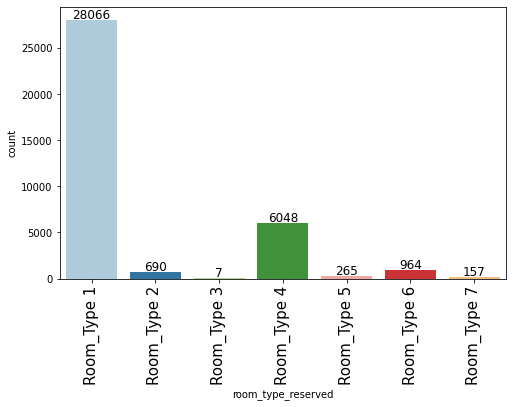

--------------------------------------
Labeled barplot for arrival_month


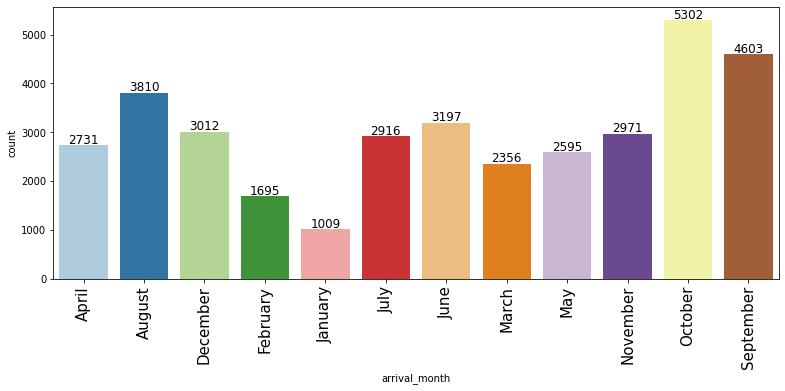

--------------------------------------
Labeled barplot for market_segment_type


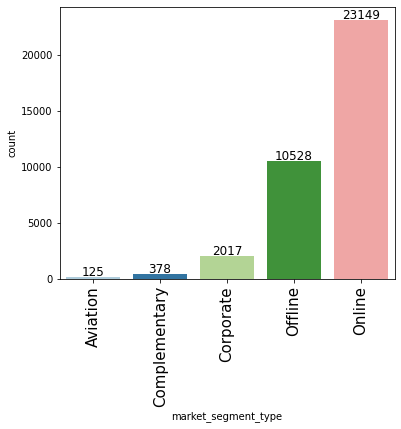

--------------------------------------
Labeled barplot for no_of_special_requests


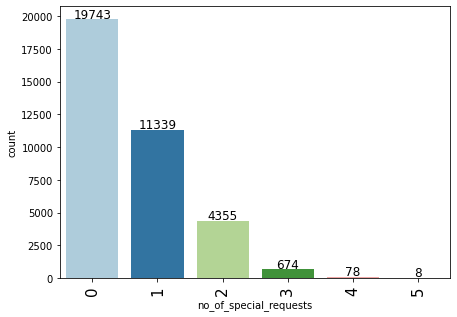

--------------------------------------
Labeled barplot for booking_status


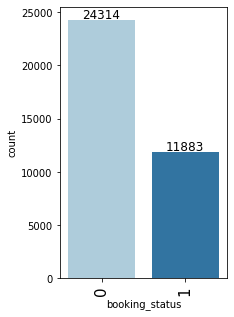

--------------------------------------


In [71]:
for col in bplot_cols:
  print(f'Labeled barplot for {col}')
  labeled_barplot(df,col)
  print('--------------------------------------')

#### Observations:
- No significant changes in the distribution of features.

### Data prepartion for modeling

- We want to predict which bookings are likely to be cancelled.
- We have already encoded categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Summary of EDA
There are 19 columns.
- 5 columns are of object type.
- 13 integer type.
- 1 float type.

- There are no missing values in the data.

- There are no duplicated values in the data.

- There are some rows with both weekend nights and weekday nights being 0 and February 29th as date, as 2017 and 2018 are non leap years, this must be data entry eroors, those rows are dropped.

- July onwards bookings increases a lot till October,October month has highest bookings.

- Most of the bookings are from Online market segment.Also most of the cancellations also from online booking.

- Online bookings show highest as well as lowest prices with wide range of prices.

- January  sees lowest price as it is not busiest month and low bookings.

- July month observes highest percentage of cancellations.
Overall around 30% of the bookings are canceled.

- Repeated guests are less likely to cancel the bookings.

- Most of the bookings does not have special requirements.When there is a special requirement it is less likely cancelled.

- Bookings done more earlier than 200 days are likely to be canceled,excluding outliers.

- When number of guests in a booking is up 5, it is less likely to be canceled.

- Customers who plan for more days are likely to cancel the booking.

- Outliers in the average price per room are treated with 3 times of IQR.

- Booking _ID is dropped from the dataset as it is not an important feature in prediction.

- arrival_year also dropped since we are predicting canceleations of future bookings.

- arrival_months are converted into categorical feature to easily interpret the results.

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel the booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel the booking but in reality, the customer will not cancel the booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [72]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [73]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [74]:
# defining the dependent and independent variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

In [75]:
# Let us look at independent variables
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

  arrival_month  arrival_date market_segment_type  repeated_guest  \
0       October             2             Offline               0   
1      November             6              Online               0   
2      February            28              Online               0   
3           May            20              Online               0   
4         April            11              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  
0            65.00000                       0  
1           106.68000                       1  
2            60.00000                       0  
3           100.00000                       0  
4            94.50000                       0

In [76]:
# Let us look at dependent variable
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [77]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                           0        224             2               0   
1                           0          5             6               0   
2                           0          1            28               0   
3                           0        211            20               0   
4                           0         48            11               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0            65.00000                       0                              0   
1           106.68000                       1                              0   
2            60.00000                       0                              0   
3           100.00000                       0                              0   
4            94.50000                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   arrival_month_August  arrival_month_December  arrival_month_February  \
0                     0                       0                       0   
1                     0                       0                       0   
2                     0                       0                       1   
3                     0                       0                       0   
4                     0                       0                       0   

   arrival_month_January  arrival_month_July  arrival_month_June  \
0       

In [78]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [79]:
# number of rows in train and test set
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25337
Number of rows in test data = 10860


In [80]:
# percentage of cancelled and not cancelled bookings
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67368
1   0.32632
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.66713
1   0.33287
Name: booking_status, dtype: float64


#### Observations:
- 67% of bookings in training data is not canceled.
- About 33% of bookings in training data are canceled.
- About 67% of bookings in testing data is not canceled.
- About 33% of bookings in testing data is canceled.

In [81]:
# adding constant to the train data
x_train1 = sm.add_constant(X_train)
# adding constant to the test data
x_test1 = sm.add_constant(X_test)

#### Model1- Logistic Regression model

In [82]:
logit = sm.Logit(y_train, x_train1.astype(float))
model1 = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25337
Model:                          Logit   Df Residuals:                    25300
Method:                           MLE   Df Model:                           36
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3431
Time:                        17:21:39   Log-Likelihood:                -10511.
converged:                      False   LL-Null:                       -16001.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.8510      0.258    -11.062      0.000      -3.356      -2.346
no_of_adults                             0.1140      

In [83]:
#### Model performance of initial logistic regression model
print("Training performance:")
model_performance_classification_statsmodels(model1, x_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80523 0.63425    0.73291 0.68002

#### Observations:
- Model shows 80% accuracy.
- Out of all canceled 63% are predicted by model.
- Out of all predicted cancellations , about 73% are really canceled.
- F1 score is about 68%.
- Model is performing well on training data.

- Negative values of the coefficient shows that probability of room booking cancellation decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of room booking cancellation increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [85]:
# VIF before feature selection
vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  309.99073
no_of_adults                             1.38702
no_of_children                           2.07249
no_of_weekend_nights                     1.07619
no_of_week_nights                        1.11283
required_car_parking_space               1.04146
lead_time                                1.32980
arrival_date                             1.01545
repeated_guest                           1.78240
no_of_previous_cancellations             1.34730
no_of_previous_bookings_not_canceled     1.59390
avg_price_per_room                       2.35974
no_of_special_requests                   1.25223
type_of_meal_plan_Meal Plan 2            1.23036
type_of_meal_plan_Meal Plan 3            1.00854
type_of_meal_plan_Not Selected           1.24159
room_type_reserved_Room_Type 2           1.09936
room_type_reserved_Room_Type 3           1.00363
room_type_reserved_Room_Type 4           1.36951
room_type_reserved_Room_Type 5    

In [86]:
# Checking model p-values
model1.pvalues

const                                  0.00000
no_of_adults                           0.00331
no_of_children                         0.00212
no_of_weekend_nights                   0.00000
no_of_week_nights                      0.00186
required_car_parking_space             0.00000
lead_time                              0.00000
arrival_date                           0.32359
repeated_guest                         0.00004
no_of_previous_cancellations           0.00033
no_of_previous_bookings_not_canceled   0.41299
avg_price_per_room                     0.00000
no_of_special_requests                 0.00000
type_of_meal_plan_Meal Plan 2          0.52381
type_of_meal_plan_Meal Plan 3          0.56921
type_of_meal_plan_Not Selected         0.00000
room_type_reserved_Room_Type 2         0.00238
room_type_reserved_Room_Type 3         0.71247
room_type_reserved_Room_Type 4         0.00057
room_type_reserved_Room_Type 5         0.00013
room_type_reserved_Room_Type 6         0.00000
room_type_res

#### Observations:
- There are features with p-values greater than 0.05. Let us remove insignificant features and check VIF again

#### Dropping high p-value variables
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05.

In [87]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_March', 'arrival_month_May', 'arrival_month_November', 'arrival_month_October', 'arrival_month_September', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [242]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [243]:
# printing selected features
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_March', 'arrival_month_May', 'arrival_month_November', 'arrival_month_October', 'arrival_month_September', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [90]:
# VIF of selected features
vif_series_selected = pd.Series(
    [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
    index=x_train2.columns,
    dtype=float,
)
print("Series after feature selection: \n\n{}\n".format(vif_series_selected))

Series after feature selection: 

const                            39.20546
no_of_adults                      1.36238
no_of_children                    2.06613
no_of_weekend_nights              1.06301
no_of_week_nights                 1.10235
required_car_parking_space        1.03987
lead_time                         1.26792
repeated_guest                    1.51064
no_of_previous_cancellations      1.20209
avg_price_per_room                1.82143
no_of_special_requests            1.23999
type_of_meal_plan_Not Selected    1.21640
room_type_reserved_Room_Type 2    1.09872
room_type_reserved_Room_Type 4    1.34419
room_type_reserved_Room_Type 5    1.02071
room_type_reserved_Room_Type 6    1.99878
room_type_reserved_Room_Type 7    1.05306
arrival_month_August              1.50785
arrival_month_December            1.45399
arrival_month_February            1.30291
arrival_month_January             1.19622
arrival_month_July                1.41210
arrival_month_March               1.35373


#### Observations:
- There are no features with  VIF greater than 5.

In [91]:
# Let us build model with selected features
logit = sm.Logit(y_train, x_train2.astype(float))
model2 = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25337
Model:                          Logit   Df Residuals:                    25308
Method:                           MLE   Df Model:                           28
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3423
Time:                        17:21:45   Log-Likelihood:                -10523.
converged:                       True   LL-Null:                       -16001.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1962      0.117    -27.219      0.000      -3.426      -2.966
no_of_adults                       0.1118      0.038      2.918      0.

#### Observations:
- Now there are no features with p-values greater than 0.05.
- Let us consider features of x_train2 as final features and model2 as final model for logistic regression.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [92]:
# converting coefficients to odds
odds = np.exp(model2.params)

# finding the percentage change
perc_change_odds = (np.exp(model2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.04092       1.11834         1.21380               1.15006   
Change_odd% -95.90845      11.83369        21.38007              15.00618   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04115                     0.19879    1.01668   
Change_odd%            4.11454                   -80.12108    1.66838   

             repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
Odds                0.07908                       1.38353             1.01985   
Change_odd%       -92.09187                      38.35284             1.98550   

             no_of_special_requests  type_of_meal_plan_Not Selected  \
Odds                        0.21997                         1.37965   
Change_odd%               -78.00318                        37.96518   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.66455                         0.83193   
Change_odd%                       -33.54542                       -16.80710   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.44980                         0.37184   
Change_odd%                       -55.02040                       -62.81627   

             room_type_reserved_Room_Type 7  arrival_month_August  \
Odds                                0.22140               0.77084   
Change_odd%                       -77.85969             -22.91586   

             arrival_month_December  arrival_month_February  \
Odds                        0.21497                 1.88695   
Change_odd%               -78.50350                88.69509   

             arrival_month_January  arrival_month_July  arrival_month_March  \
Odds                       0.12091             0.78574              1.38938   
Change_odd%              -87.90877           -21.42599             38.93842   

             arrival_month_May  arrival_month_November  arrival_month_October  \
Odds                   0.70174                 1.34930                0.87631   
Change_odd%          -29.82639                34.93002              -12.36941   

             arrival_month_September  market_segment_type_Corporate  \
Odds                         0.63999                        0.41295   
Change_odd%                -36.00132                      -58.70453   

             market_segment_type_Offline  
Odds                             0.16380  
Change_odd%                    -83.62017

### Coefficient interpretations
* `no_of_adults`: Holding all other features constant a unit change in number of adults will increase the odds of a booking being canceled by 1.1 times or a 11.83% increase in the odds.

* `no_of_children`: Holding all other features constant a unit change in no_of_children will increase the odds of a booking being canceled by 1.22 times or about 21% increase in odds.

* `no_of_weekend_nights`:  Holding all other features constant a unit change in number of weekend nights will increase the odds of a booking being canceled by 1 time or about 15% increase in the odds.

* `no_of_week_nights`:  Holding all other features constant a unit change in number of week nights will increase the odds of a booking being canceled by 1 time or about 4% increase in the odds.

* `required_car_parking_space`:  Holding all other features constant a unit change in number of car parking space space needed will decrease the odds of a booking being canceled by about 0.2 times or a 80% decrease in the odds.

* `lead_time`: Holding all other features constant a unit change in number of lead time will increase the odds of a booking being canceled by 1.6 time or about 1.7% increase in the odds.

* `repeated_guest`:  Holding all other features constant repated guests will decrease the odds of a booking being canceled by 0.07 times or a 92% decrease in the odds.

* `no_of_previous_cancellations`: Holding all other features constant a unit change in number of previous cancellations will increase the odds of a booking being canceled by 1.38 times or a 38% increase in the odds.

* `avg_price_per_room`: Holding all other features constant a unit change in avearge price per room will increase the odds of a booking being canceled by 1 time or about 2% increase in the odds.

* `no_of_special_requests`: Holding all other features constant a unit change in number of special requests made will decrease the odds of a booking being canceled by about 0.2 times or a 78% decrease in the odds.

* `type_of_meal_plan_Not Selected`: The odds of a booking for which  meal plan is not selected being canceled is 1.37 times more than a booking for which has any other type of meal plans are selected or about 38% more odds than a booking with meal plan selected. [keeping all the other categorical levels of Meal plans as a reference].

* `room_type_reserved_Room_Type 2`: The odds of a booking for which  Room type-2 is selected being canceled is about 0.66 times lesser than a booking for which any other type of room types selected or about 34% fewer odds than a booking with any other room type selected.

* `room_type_reserved_Room_Type 4`: The odds of a booking for which  Room type-4 is selected being canceled is about 0.83 times lesser than a booking for which any other type of room types selected or about 17% fewer odds than a booking with any other room type selected.

* `room_type_reserved_Room_Type 5`: The odds of a booking for which  Room type-5 is selected being canceled is about 0.45 times lesser than a booking for which any other type of room types selected or about 55% fewer odds than a booking with any other room type selected.

* `room_type_reserved_Room_Type 6`: The odds of a booking for which  Room type-6 is selected being canceled is about 0.37 times lesser than a booking for which any other type of room types selected or about 62% fewer odds than a booking with any other room type selected.

* `room_type_reserved_Room_Type 7`: The odds of a booking for which  Room type-2 is selected being canceled is about 0.22 times lesser than a booking for which any other type of room types selected or about 77% fewer odds than a booking with any other room type selected.

* `market_segment_type_Corporate`: The odds of a booking done through market_segment_type_Corporate being canceled is 0.41 times less than a bookings done through other market segment types or about 59% fewer odds than a bookings done through other market segments [keeping all the other categorical levels of market segments as a reference].

* `market_segment_type_Offline`: The odds of a booking done through market_segment_type_Offline being canceled is 0.16 times less than a bookings done through other market segment types or about 84% fewer odds than a bookings done through other market segments [keeping all the other categorical levels of market segments as a reference].

* `arrival_month_August`, `arrival_month_December` ,`arrival_month_January` ,`arrival_month_July` ,`arrival_month_May` , `arrival_month_October` and `arrival_month_September` have about 23%,78%,88%,21%,30%,12% and 36% fewer odds respectively


* `arrival_month_February`	`arrival_month_March` and `arrival_month_November` have about 88.7%,39% and 35% more odds respectively

## Model performance evaluation

#### Checking model performance on the training set

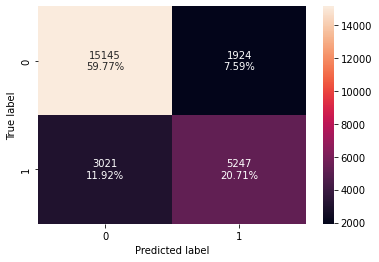

In [175]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, x_train2, y_train)

In [176]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    model2, x_train2, y_train
)

log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80483 0.63462    0.73170 0.67971

#### ROC-AUC
- ROC_AUC on training set

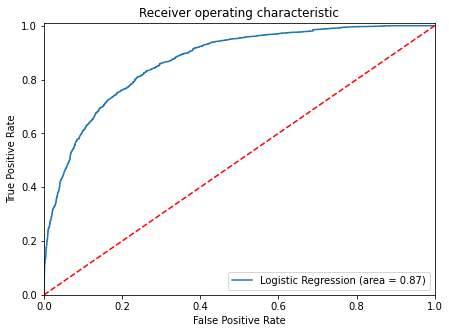

In [177]:
logit_roc_auc_train = roc_auc_score(y_train, model2.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, model2.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observations:
- F1 score is about 68%
- Recall is about 63%
- Precision is about 73%
- ROC-AUC score is 87%
- Recall is little less compatred to precision. Since  precision and recall both are important for our solution, let us try to improve F1 score.

### Model Performance Improvement
- Let us see if F1 score can be improved by changing model threshold using AUC-ROC curve.

In [178]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model2.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2999195894412491


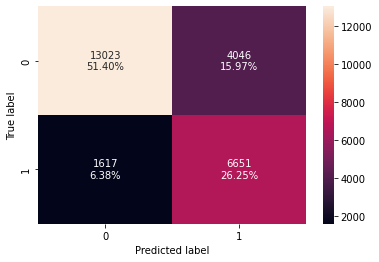

In [179]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [180]:
# checking model performance for this model with optimal threshold
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        model2, x_train2, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77649 0.80443    0.62176 0.70140

#### Observations:
- F1 score slightly improved.
- Precision has decresed.
- Recall improved.
- Accuracy slightly decreased.

#### Let's use Precision-Recall curve and see if we can find a better threshold


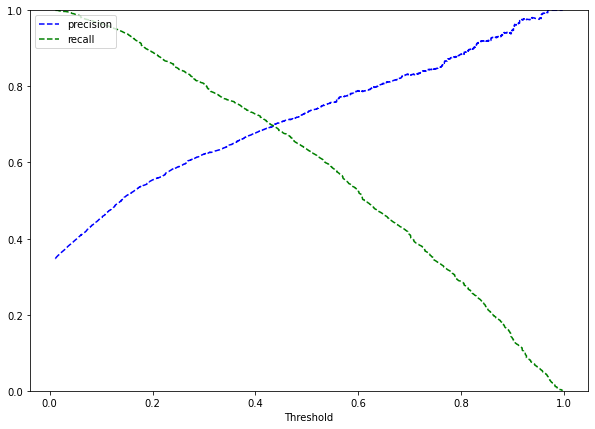

In [181]:
y_scores = model2.predict(x_train2)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

#### Observations:
- At threshold 0.42 we are getting a balanced precision and recall.

In [182]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

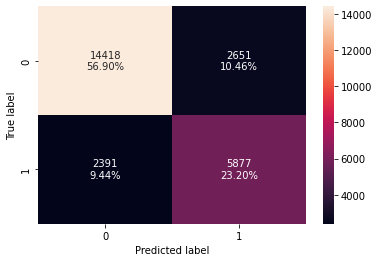

In [183]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, x_train2, y_train, threshold=optimal_threshold_curve
)

In [184]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    model2, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80100 0.71081    0.68914 0.69981

### Let's check the performance on the test set

**Using model with default threshold**

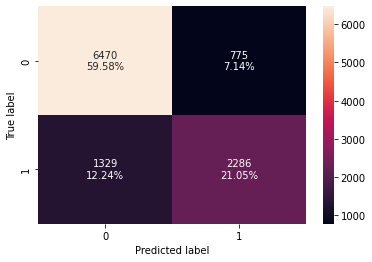

In [185]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, x_test2, y_test)

In [186]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    model2, x_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80626 0.63237    0.74681 0.68484

#### Observations:
At threshold 0.42 on training set F1 score is about 0.70 and on testing set F1 score is about 0.68
- There is a balance between precision and recall.

#### ROC curve on test set

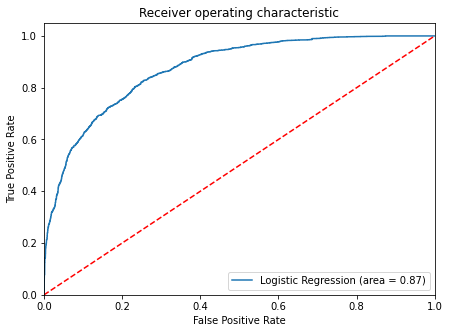

In [187]:
logit_roc_auc_train = roc_auc_score(y_test, model2.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

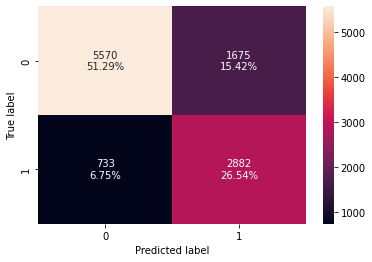

In [188]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, x_test2, y_test, threshold=optimal_threshold_auc_roc
)

In [189]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        model2, x_test2, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77827 0.79723    0.63243 0.70534

**Using model with threshold=0.42** 

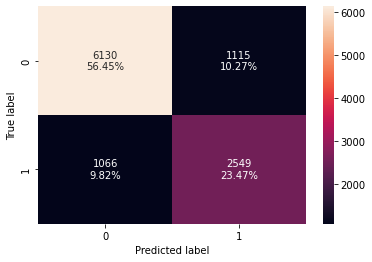

In [190]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, x_test2, y_test, threshold=optimal_threshold_curve)

In [191]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    model2, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79917 0.70512    0.69569 0.70037

### Model performance summary

#### On training data:

In [192]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80483                             0.77649   
Recall                            0.63462                             0.80443   
Precision                         0.73170                             0.62176   
F1                                0.67971                             0.70140   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80100  
Recall                                0.71081  
Precision                             0.68914  
F1                                    0.69981

#### On testing data

In [193]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                          0.80626                             0.77827   
Recall                            0.63237                             0.79723   
Precision                         0.74681                             0.63243   
F1                                0.68484                             0.70534   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79917  
Recall                                0.70512  
Precision                             0.69569  
F1                                    0.70037

## Final Model Summary - Logistic Regresiion



 We have been able to build a predictive model that can be used to predict any bookings being canceled.

- All the logistic regression models are giving a generalized performance on training and test set.

- Using the model with default threshold the model will give a good precision compared to recall score - This model will help the INN hotel to save resources but lose on potential bookings that are not being canceled.

- Using the model with 0.37 threshold the model will give a more recall compared to precision scores - This model will help the INN hotels to identify potential bookings canceled effectively but the cost of resources will be high.

- Using the model with 0.42 threshold on both training and testing data, the model  F1- score is about 0.70,which is giving a balance recall and precision score - 
 * Recall of 0.71 implies that out of all the bookings,where bookings are canceled, model predicted 71% of them correctly.
 * Precision of about 0.69 implies that out of all the bookings where our model predicted that bookings will be canceled, about 69% were predicted correctly.
 * This model will help the INN hotels to maintain a balance in identifying bookings being canceled and not canceled.

## Building a Decision Tree model

In [194]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

  arrival_month  arrival_date market_segment_type  repeated_guest  \
0       October             2             Offline               0   
1      November             6              Online               0   
2      February            28              Online               0   
3           May            20              Online               0   
4         April            11              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  
0            65.00000                       0               0  
1           106.68000                       1               0  
2            60.00000                       0               1  
3           100.00000                       0               1  
4            94.50000                       0               1

In [195]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                           0        224             2               0   
1                           0          5             6               0   
2                           0          1            28               0   
3                           0        211            20               0   
4                           0         48            11               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0            65.00000                       0                              0   
1           106.68000                       1                              0   
2            60.00000                       0                              0   
3           100.00000                       0                              0   
4            94.50000                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   arrival_month_August  arrival_month_December  arrival_month_February  \
0                     0                       0                       0   
1                     0                       0                       0   
2                     0                       0                       1   
3                     0                       0                       0   
4                     0                       0                       0   

   arrival_month_January  arrival_month_July  arrival_month_June  \
0       

In [196]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [197]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25337
Number of rows in test data = 10860


In [198]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67368
1   0.32632
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.66713
1   0.33287
Name: booking_status, dtype: float64


#### Observations:
- There are 25337 rows in training data and 10860 rows in testing data
- About 67% of booking status are not canceled and about 33% of booking status are canceled in both training and testing data. 

In [199]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [200]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [201]:
dtmodel1 = DecisionTreeClassifier(class_weight="balanced",random_state=1)
dtmodel1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

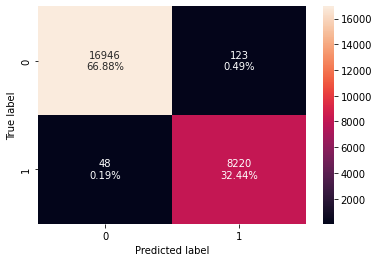

In [202]:
# confusion matrix
confusion_matrix_sklearn(dtmodel1, X_train, y_train)

In [203]:
# Model performance on training data
decision_tree_perf_train = model_performance_classification_sklearn(
    dtmodel1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99325 0.99419    0.98526 0.98971

#### Observations:
- F1-score is about  0.99.
- Decision tree model is performing very good on training data.

#### Checking model performance on test set

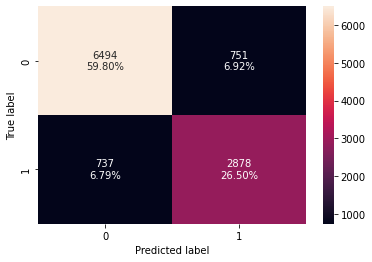

In [204]:
confusion_matrix_sklearn(dtmodel1, X_test, y_test)

In [205]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dtmodel1, X_test, y_test
)  ## Complete the code to check performance on test set
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86298 0.79613    0.79306 0.79459

#### Observations:
- F1 score on test data is about 0.79. It is less compared to F1-score on training set.
-Since our model is overfitting on training data and giving high F1- score for training set.

In [206]:
features_dtmodel1=dtmodel1.feature_names_in_

### Visualizing Decision tree

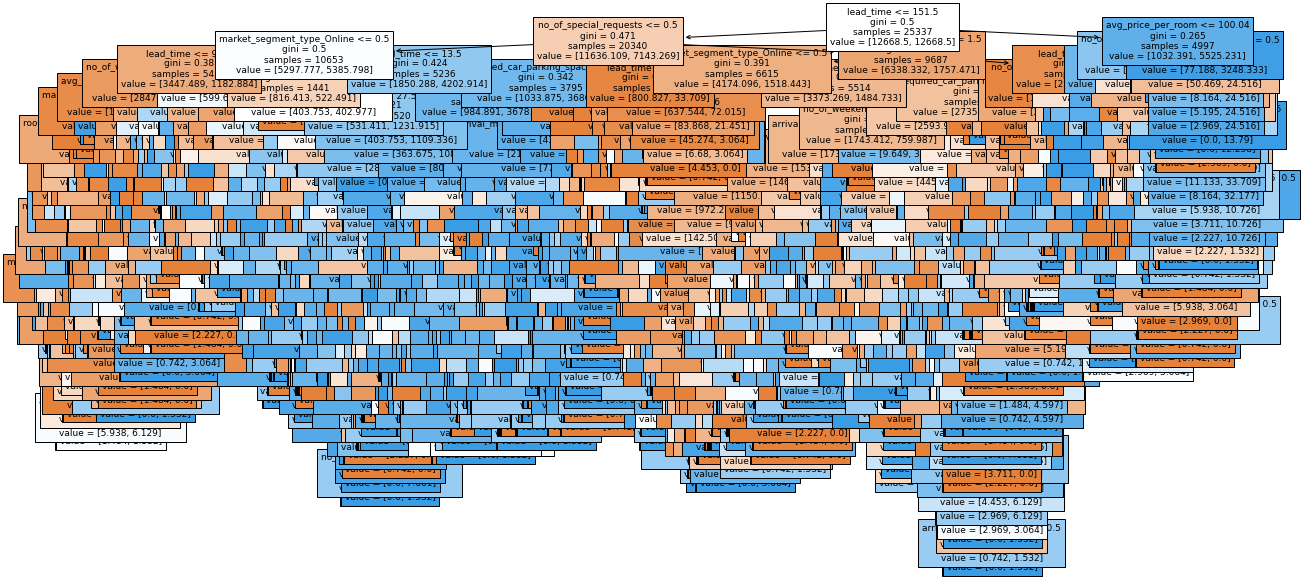

In [207]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtmodel1,
    feature_names=features_dtmodel1,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### let us check the important fetures

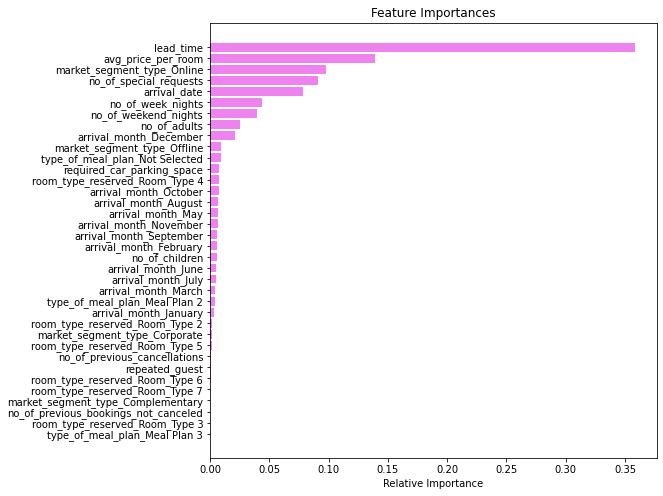

In [208]:
feature_names = list(X_train.columns)
importances = dtmodel1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- Out of all the features, lead time is more important in identifying a booking to be canceled
-Next average price of the room, market segment type online are important features.

In [209]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtmodel1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 162.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  162.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month_December <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- tr

####  The above rules of decision tree is too complex. 
* In general, the deeper we allow your tree to grow, the more complex your model will become because we will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
- Let us prune the tree

### Pruning the tree

**Pre-Pruning**

In [210]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

#### Checking performance on training set

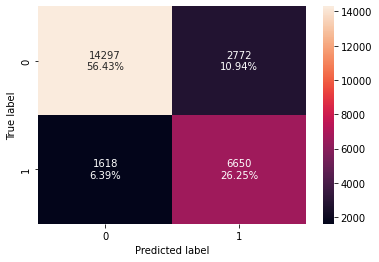

In [211]:
# confusion matrix for training data
confusion_matrix_sklearn(estimator,X_train,y_train)

In [212]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.82674 0.80431    0.70579 0.75184

#### Observations:
- F1-score is 0.75. 
-Model is performing well on training set

#### Checking performance on test set

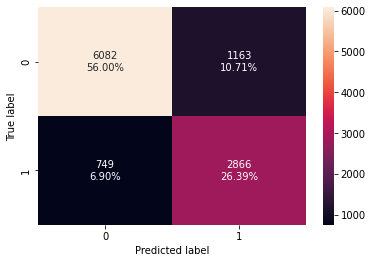

In [213]:
# confusion matrix for testing data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [214]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.82394 0.79281    0.71134 0.74987

#### Observations:
- F1-score is about 0.75 which is almost same as traing set
- Model is performing good on testing data

### Visualizing the Decision Tree

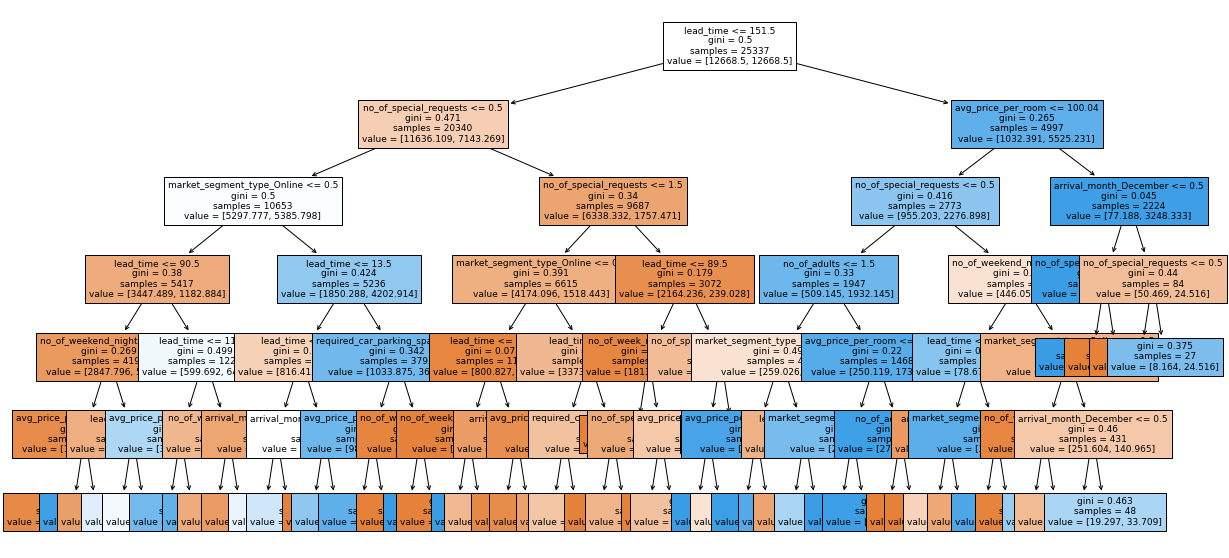

In [215]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [216]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1769.39, 131.77] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.74, 26.05] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [946.30, 226.77] class: 0
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [131.37, 157.82] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [222.66, 235.96] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [80.16, 275.80] 

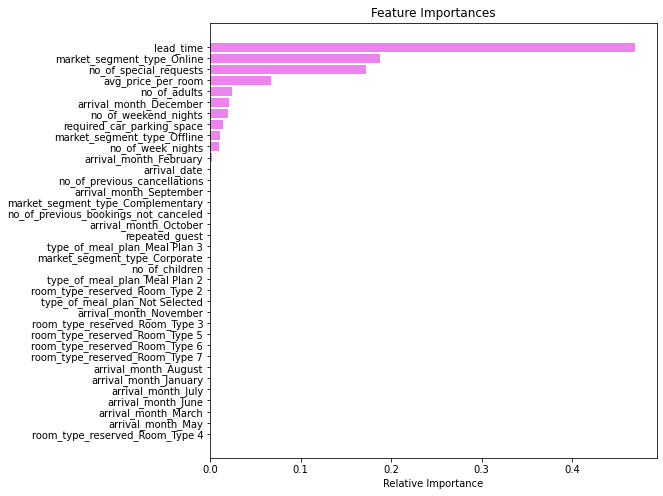

In [217]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
-Lead time is still the most important feature.
- Market segment type online and and number of special requests made are next important features.
- The above tree is still complex but better than initial tree. Letus try post pruning with ccp_alpha

**Cost Complexity Pruning**

- Cost complexity pruning provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``increase the number of nodes pruned.

#### Total impurity of leaves vs effective alphas of pruned tree

In [218]:
# Let us find total impurity of leaves vs effective alphas of pruned tree on training set
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [219]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00848
1        0.00000     0.00848
2        0.00000     0.00848
3        0.00000     0.00848
4        0.00000     0.00848
...          ...         ...
1719     0.00911     0.32606
1720     0.00960     0.33566
1721     0.01255     0.34820
1722     0.03492     0.41804
1723     0.08196     0.50000

[1724 rows x 2 columns]

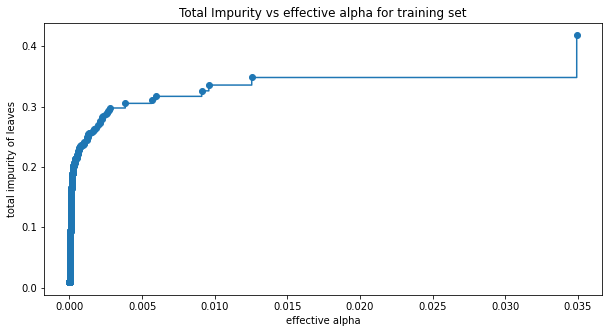

In [220]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### As effective alpha increases, total impurity of leaves also increases.

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [221]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.08195667405752544


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

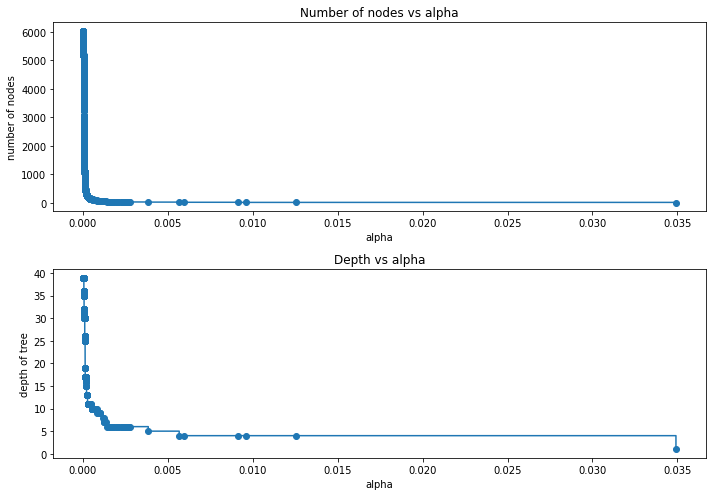

In [222]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [223]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

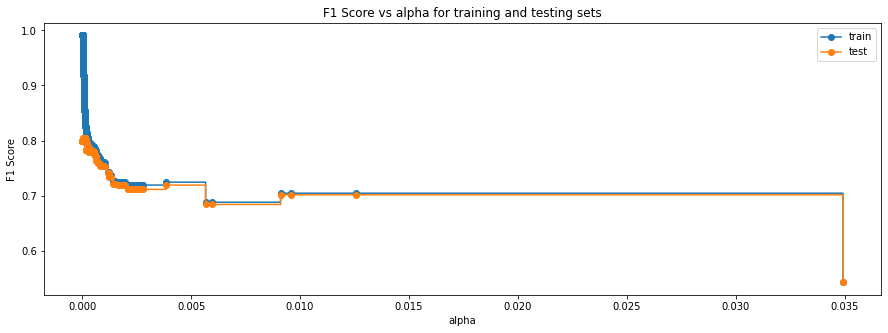

In [224]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### As alpha increases training and testing F1-scores also decreases. When alpha is in between 0.010 and 0.034 both training and testing set have F1-score around 0.7


In [225]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=9.851214129449133e-05, random_state=1)


#### Checking performance on training set

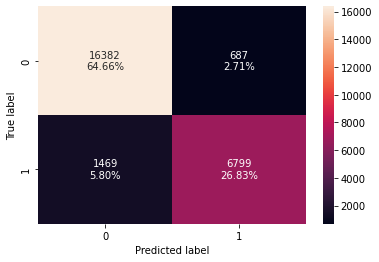

In [226]:
#Confusion matrix for training data of best model
confusion_matrix_sklearn(best_model, X_train, y_train)

In [227]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.91491 0.82233    0.90823 0.86315

#### Checking performance on test set


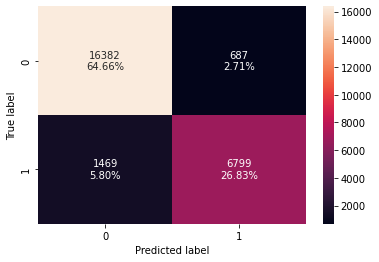

In [228]:
# confision matrix on test data for best model
confusion_matrix_sklearn(best_model, X_train, y_train)

In [229]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.87615 0.77012    0.84415 0.80544

#### Observations:
-F1 score of this model on traing set is 0.86
-F1 score of this model on testing set is 0.80

#### Visualizing the tree

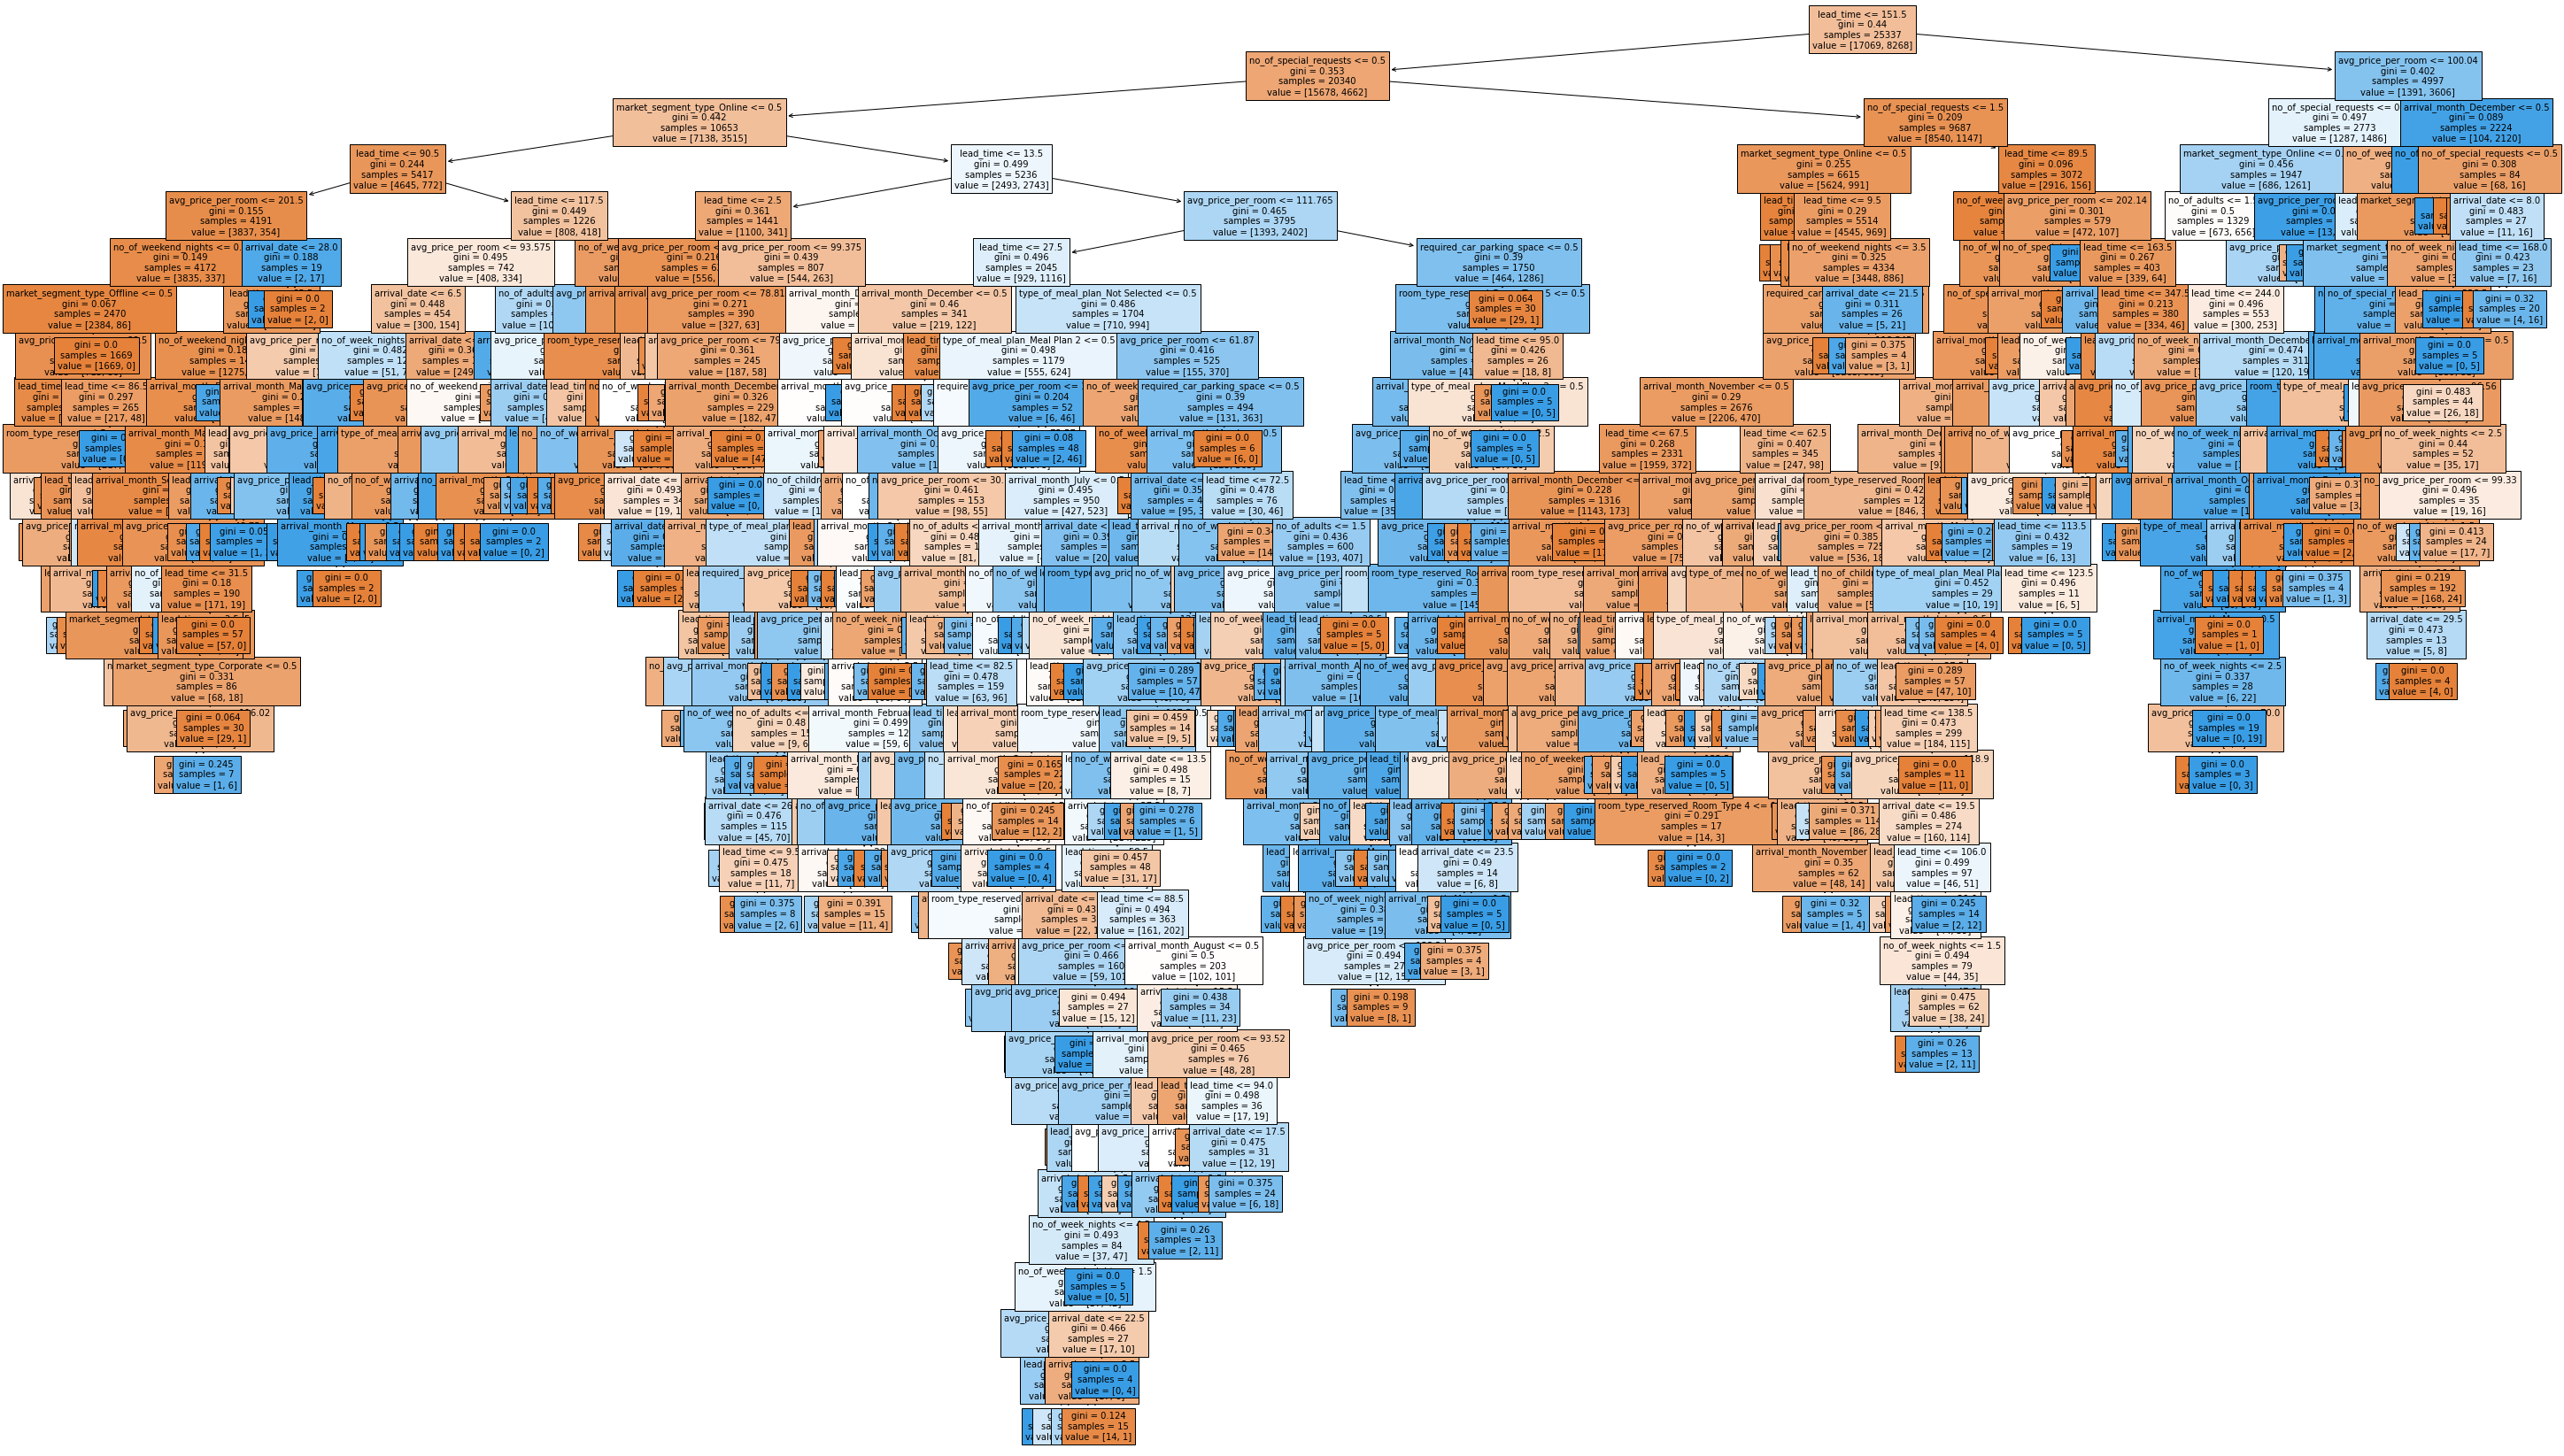

In [230]:
plt.figure(figsize=(50, 30))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [231]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- weights: [398.00, 20.00] class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 21.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 13.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [7.00, 1.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  13.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 6.00] class: 1
|   |   |   |   |   |   |   |   |   |--- lead_time >  21.50
|   |   |   |   |   

#### Observation from the tree
Using the above extracted decision rules we can make interpretations from the decision tree model like:

-If a booking has lead time greater than 151.5 days and average price per room is > 100.04 and arrival month is December and number of special requests <=2.5 booking is likely to be canceled.

-If a booking has lead time greater than 151.5 days and average price per room is > 100.04 and arrival month is December and number of special requests > 2.5 booking is likely to be not canceled.


Similar interpreatation can be done for all the decision rules.

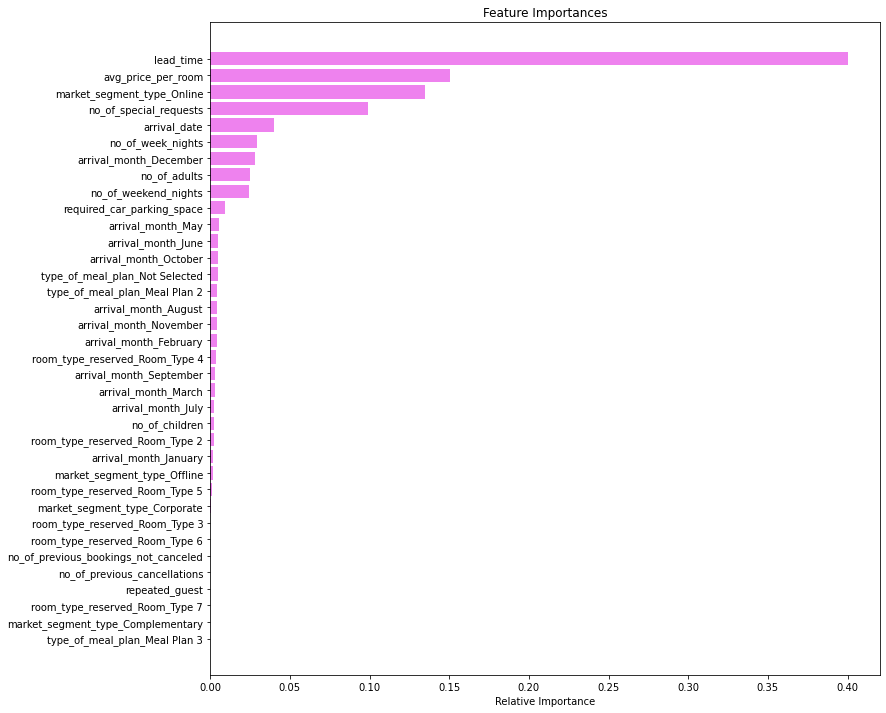

In [232]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- Lead time is the most important feature in our cost-complexity prunes model.
- Next is average price per room and Market segment Online.

## Model Performance Comparison and Conclusions

In [233]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99325                      0.82674   
Recall                   0.99419                      0.80431   
Precision                0.98526                      0.70579   
F1                       0.98971                      0.75184   

           Decision Tree (Post-Pruning)  
Accuracy                        0.91491  
Recall                          0.82233  
Precision                       0.90823  
F1                              0.86315

In [244]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86298                      0.82394   
Recall                   0.79613                      0.79281   
Precision                0.79306                      0.71134   
F1                       0.79459                      0.74987   

           Decision Tree (Post-Pruning)  
Accuracy                        0.87615  
Recall                          0.77012  
Precision                       0.84415  
F1                              0.80544

#### Observations:
- From the above 3 decision tree models, initial tree is showing highest F1- score but it is overfitting on training data and very complex.
- Pre-pruning reduced complexity of the tree.
- Both pre-pruning and post-pruning reduced overfitting and giving good F1-score.
- Post pruned model is giving good balance of precision and recall on training set.

### Conclusion:
- We have been able to build a predictive model using `Logistic Regression` and `Decision Tree` that can be used by the INN Hotels Group to predict which bookings are likely to be canceled.

F1-score is the performance measure as we want balance between precision and recall.

####Under Logistic Regression Model:
  - All the models are giving a generalized performance on training and test set.

  -Using the model with 0.42 threshold on both training and testing data, the model  F1- score is 0.70,which is giving a balance recall and precision score 
 * Recall of 0.71 implies that out of all the bookings,where bookings are canceled, model predicted 71% of them correctly.
 * Precision of 0.687 implies that out of all the bookings where our model predicted that bookings will be canceled, 68.7% were predicted correctly.
 * This model will help the INN hotels to maintain a balance in identifying bookings being canceled and not canceled.

Coefficients of,
number of adults,number of children,number of weekend nights, number of weeknights,lead time,number of previous cancellations,average price per room, and months February,March,November and meal plan not selected - 
are positive.An increase in these will lead to increase the chances of booking being canceled.

Coefficients of,
required car parking space, repeated guest,number of special request,room types 2,4,5,6,7 and months like August,December, Janaury,June,July,May, October,September and market segment corporate and offline - 
are negetive. An increase in these will decrease the chances of booking being canceled.


####Under Decision Tree Model:
We visualized different trees and their confusion matrix to get a better understanding of the model.

Decision tree is giving high F1-score for the initial tree on training data. That also might indicate overfitting on training data.

Pre-pruned tree is giving F-1 score of about 0.75,which is good as well and tree is less complex compared to initial tree.

Post-pruned tree is giving F1-score of about 0.81 which is better than pre-pruned tree.

Pre-pruned and post-pruned trees reduced overfitting and giving generalised result on both training and testing set.

Lead time,average price per room and market segment type online are 3 top most  important features in predicting booking status.

F1-score of decision tree is better than F1-score of Logistic regression model



From both the models we can say lead_time,average_priece_per room, no_of_guests, some months,meal_plans,nuO_of_previous_cancellations  etc play role in booking status to be caceled.

Post-pruned decison tree model(best model) can be used for better prediction.

#### Recommendations:

- If more than one different guests are trying to book for same day, Hotel can create a queue and put bookings that are more likely to be canceled under that waiting list. And assign room for that guest who is more likely not to cancel.

- We can add one more feature to know cancellation dates and use that to predict bookings more accurately and can calculate cancellation fees and refund amount according to time between booking date and cancellation dates.

- Also hotel can charge high cancellation fees for bookings that are highly likely to be canceled.

- As we found repeated guests are less likely to cancel,customer retention program for repeated guests who have never or very few number of times canceled previous bookings can be done by giving special discounts for them.

- The dataset has booking records from July 2017 to December 2018. Customer needs keep changing as time passes. So making this model to work on dynamic dataset would help to predict more accurately.

- Hotel can also adjust average price per room dynamically based on chances of a booking being canceled.

- Special discounts can be given if total number of days a booking is made is more than average number of days.

- Few months show lesser chance of cancellations and other months show more chances of cancellations. More data to be collected to analyse it further.

- As we see there is large outliers in lead time, we can add extra feature like purpose of the stay and analyze it to check if it affects lead time and predict better.

- We can also add deposite amount feature which is to be predicted dynamically based on chances of cancellations. Higher the chance of cancellations higher deposite and vice-versa. This will reduce loss to some degree.

- Machine Learning app can be built to predict cancellations more accurately
based on monthwise, market-segment wise, room type wise, purpose of the stay,holiday seasonwise etc.